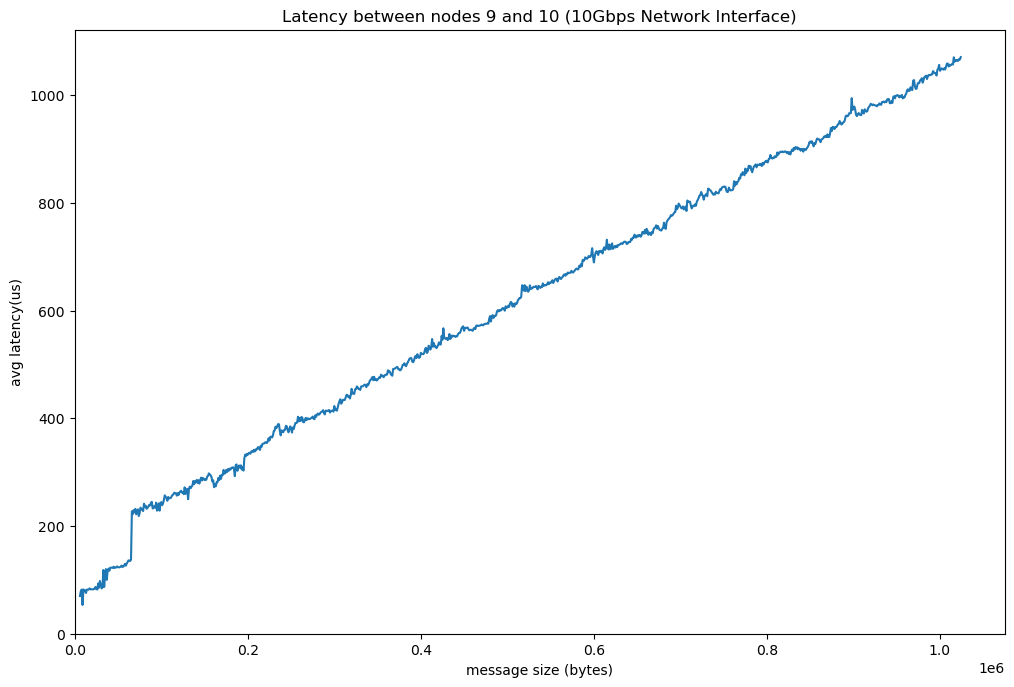

alpha=138.6022474746783
beta=0.0009206472558891672
estimated bandwidth=1086.1923430534678


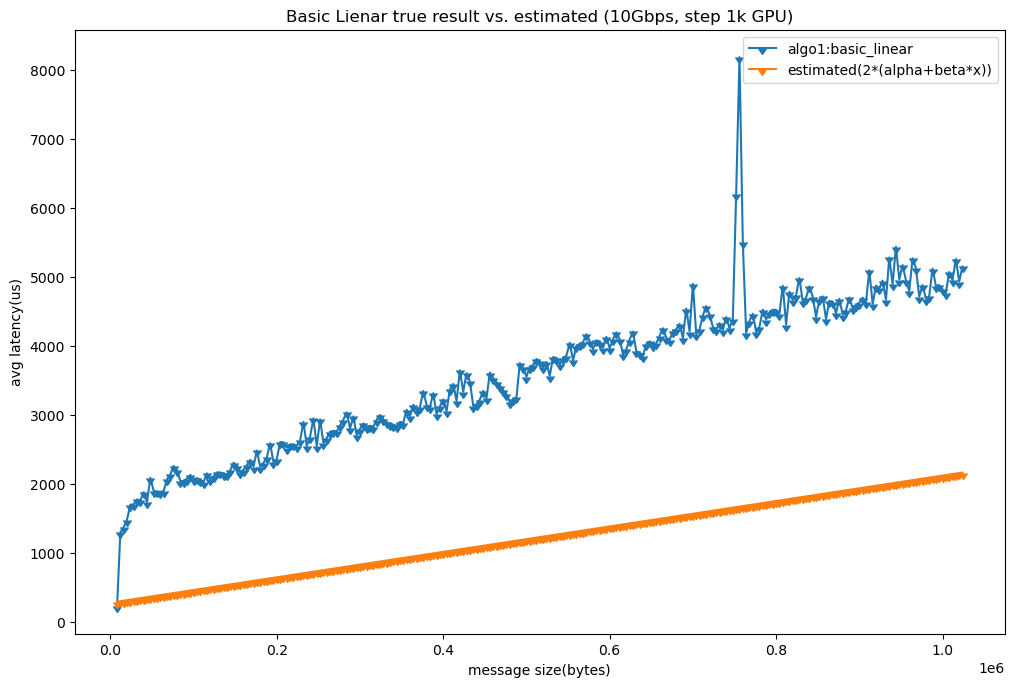

mse is:5879027.687686311


In [7]:
x = []
y = []

with open('data/lat-10g-step1k-modified.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step1k.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

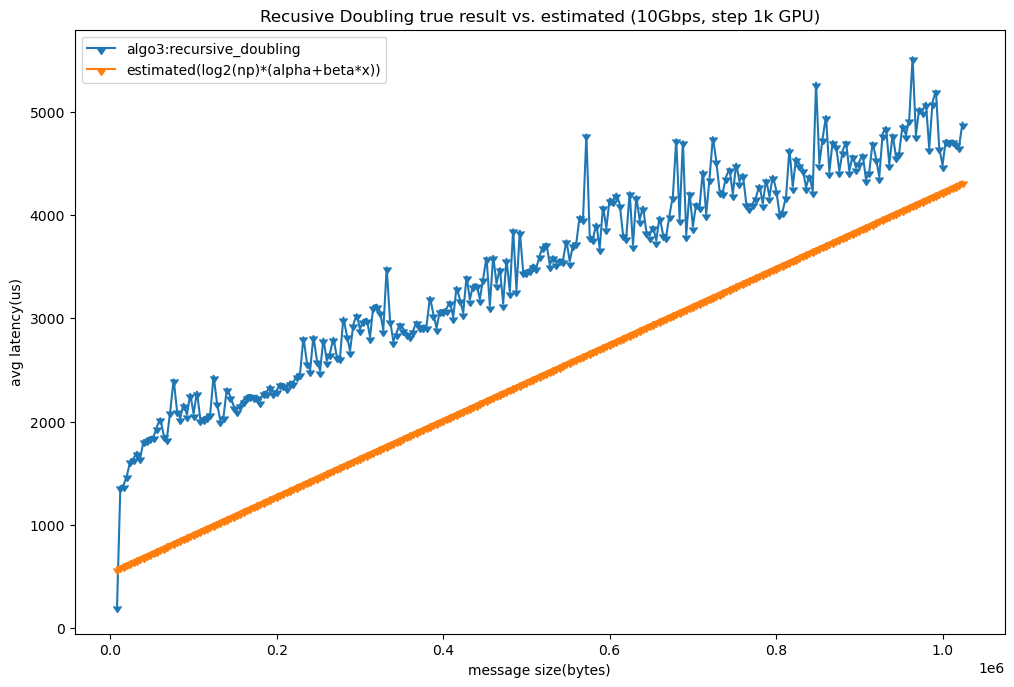

mse is:1108999.3074458814


In [8]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step1k.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

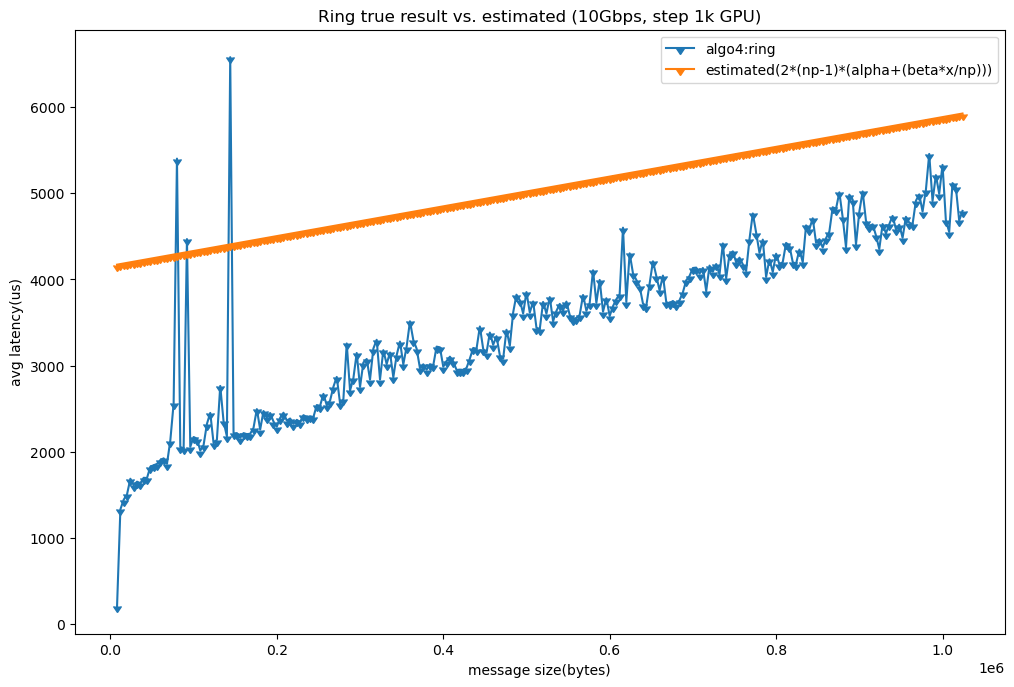

mse is:2752164.3236304577


In [5]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step1k.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

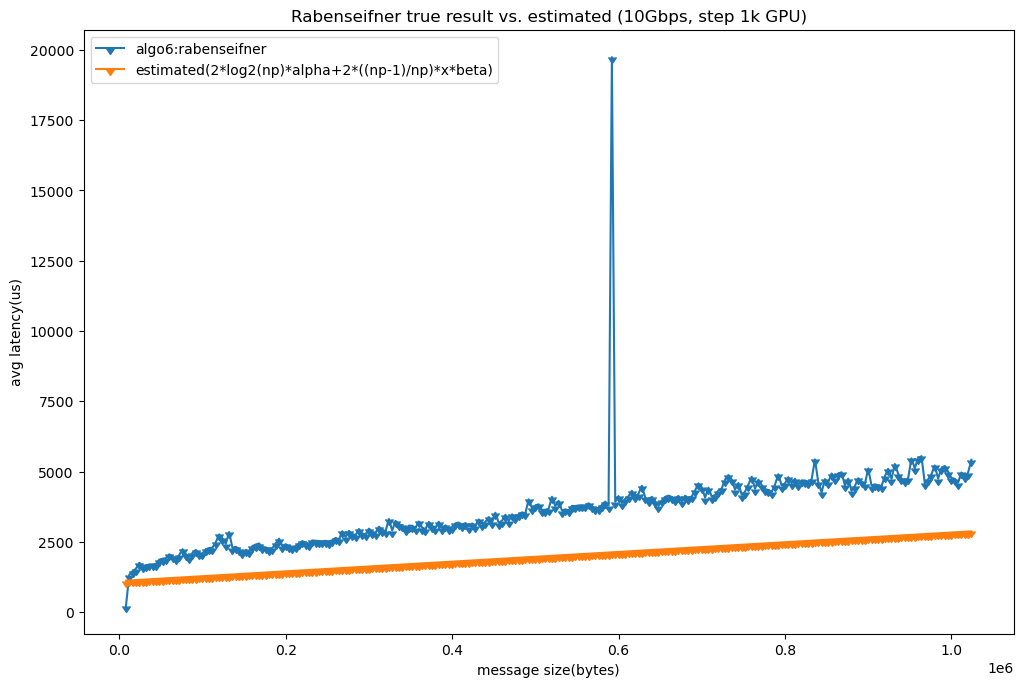

mse is:3957668.723158647


In [6]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step1k.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

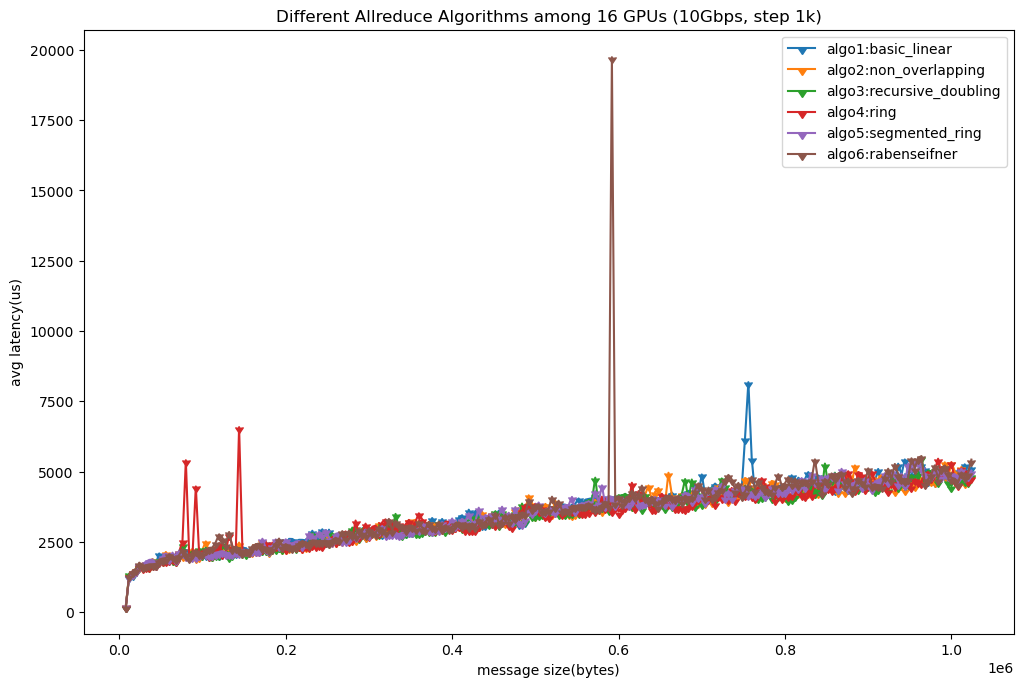

In [11]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step1k.txt')
_, y2 = read_algo_with_head('data/gpus/10g-16cpu-algo2-step1k.txt')
_, y3 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step1k.txt')
_, y4 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step1k.txt')
_, y5 = read_algo_with_head('data/gpus/10g-16cpu-algo5-step1k.txt')
_, y6 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step1k.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step 1k)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

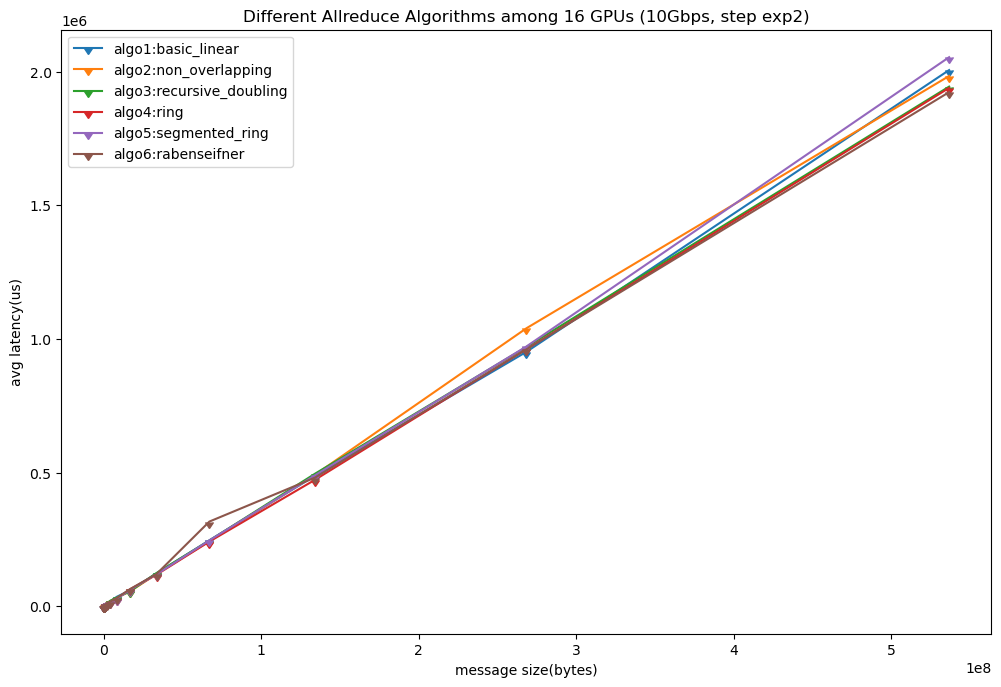

In [12]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-stepexp2.txt')
_, y2 = read_algo_with_head('data/gpus/10g-16cpu-algo2-stepexp2.txt')
_, y3 = read_algo_with_head('data/gpus/10g-16cpu-algo3-stepexp2.txt')
_, y4 = read_algo_with_head('data/gpus/10g-16cpu-algo4-stepexp2.txt')
_, y5 = read_algo_with_head('data/gpus/10g-16cpu-algo5-stepexp2.txt')
_, y6 = read_algo_with_head('data/gpus/10g-16cpu-algo6-stepexp2.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step exp2)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

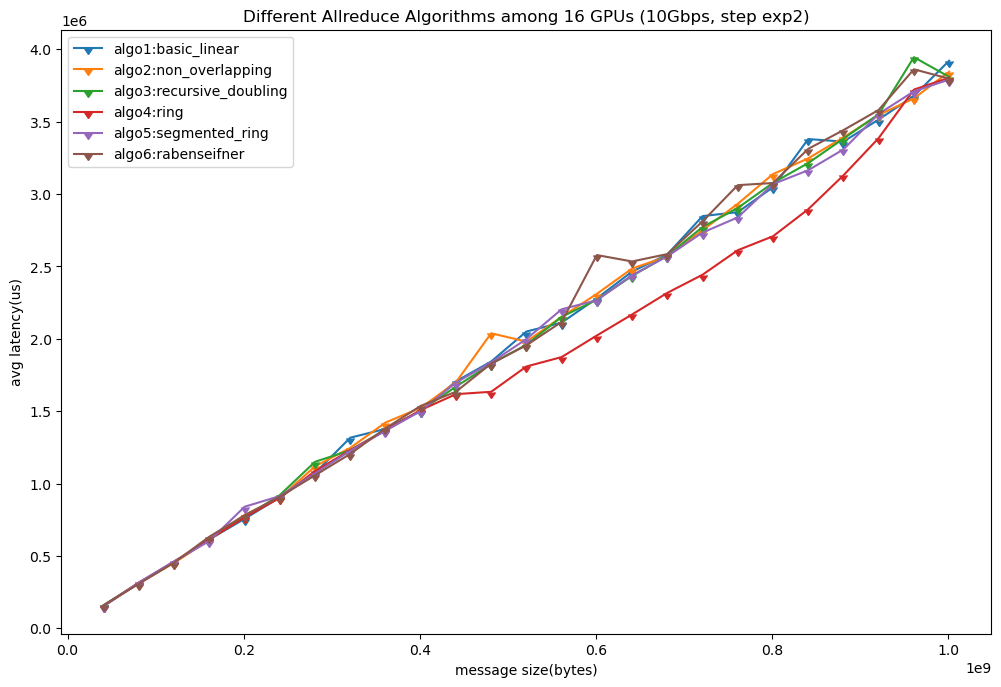

In [13]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step10m.txt')
_, y2 = read_algo_with_head('data/gpus/10g-16cpu-algo2-step10m.txt')
_, y3 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step10m.txt')
_, y4 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step10m.txt')
_, y5 = read_algo_with_head('data/gpus/10g-16cpu-algo5-step10m.txt')
_, y6 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step10m.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step exp2)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

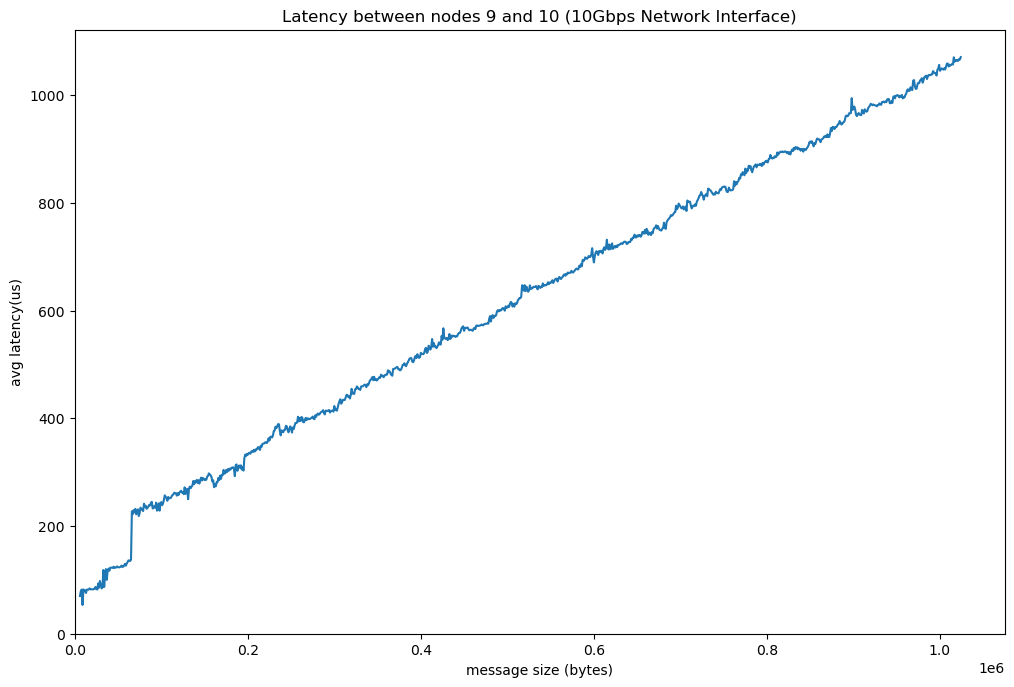

alpha=138.6022474746783
beta=0.0009206472558891672
estimated bandwidth=1086.1923430534678


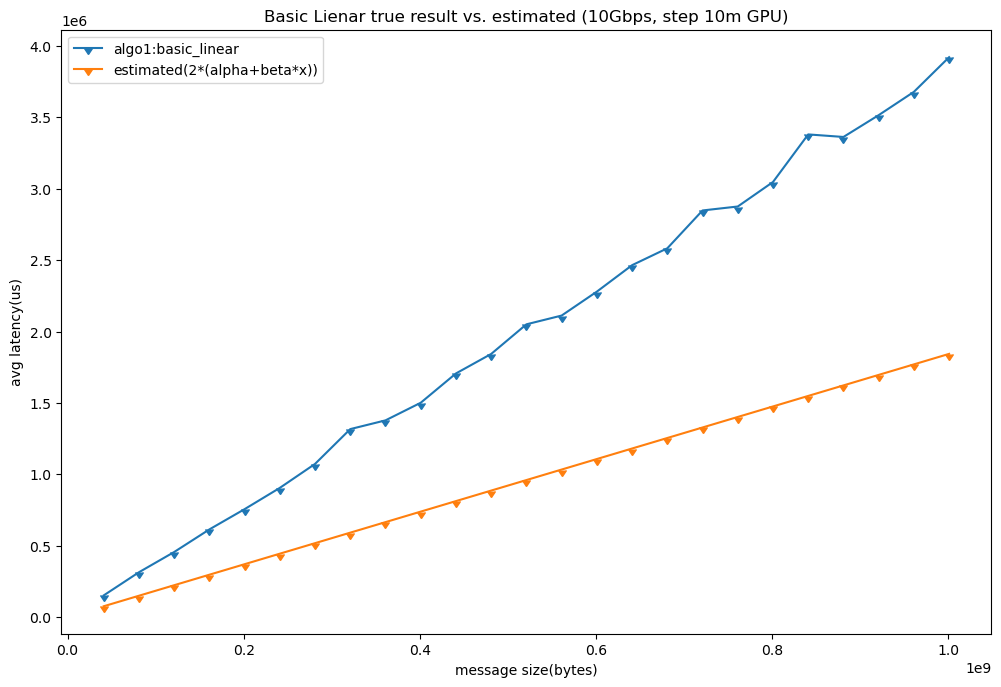

mse is:1437185750333.3696


In [8]:
x = []
y = []

with open('data/lat-10g-step1k-modified.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo1-step10m.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

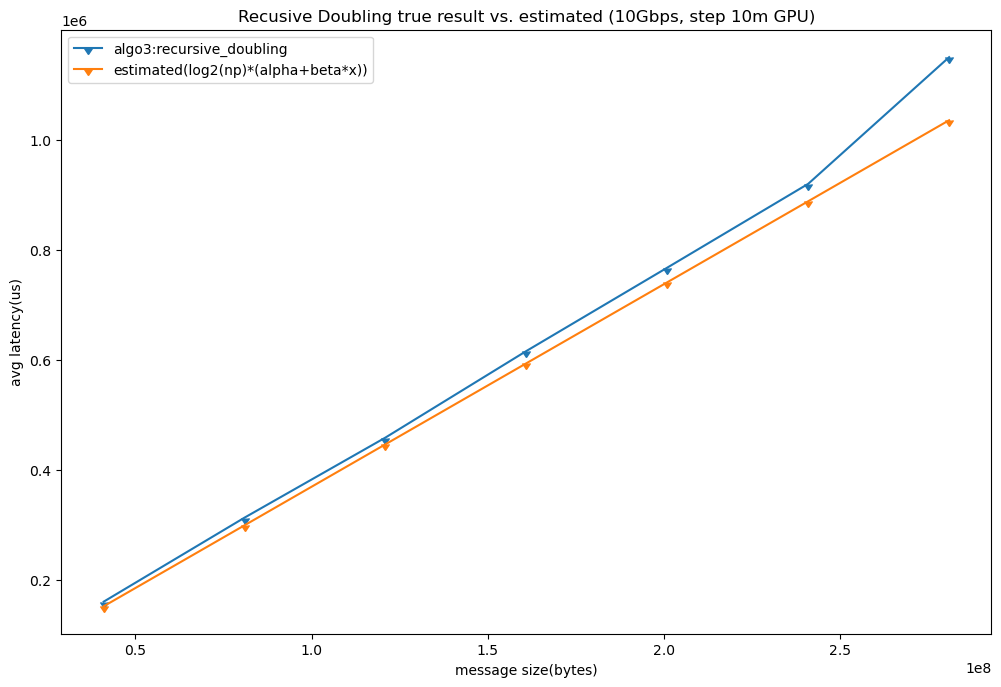

mse is:2253181543.7574153


In [10]:
x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo3-step10m.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

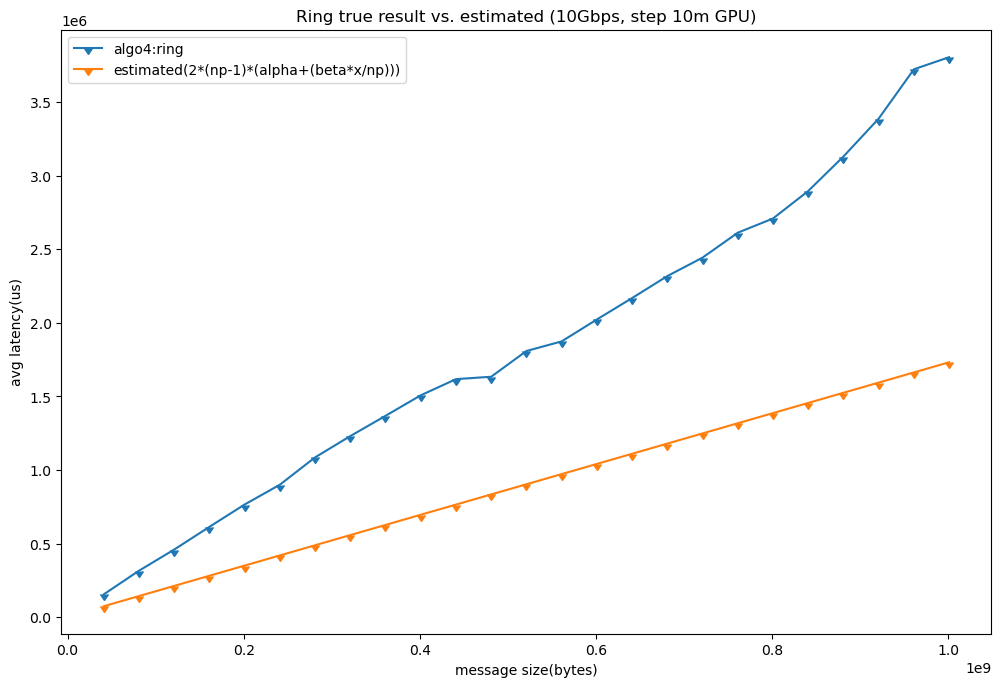

mse is:1209295383614.2876


In [14]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo4-step10m.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

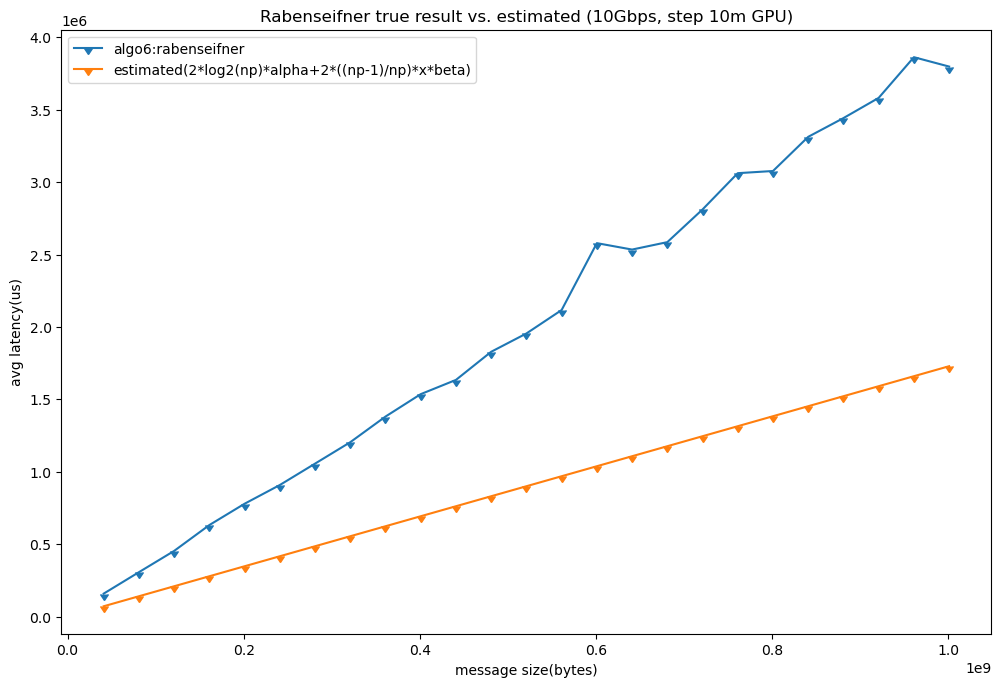

mse is:1674172575895.3914


In [15]:


x, y1 = read_algo_with_head('data/gpus/10g-16cpu-algo6-step10m.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

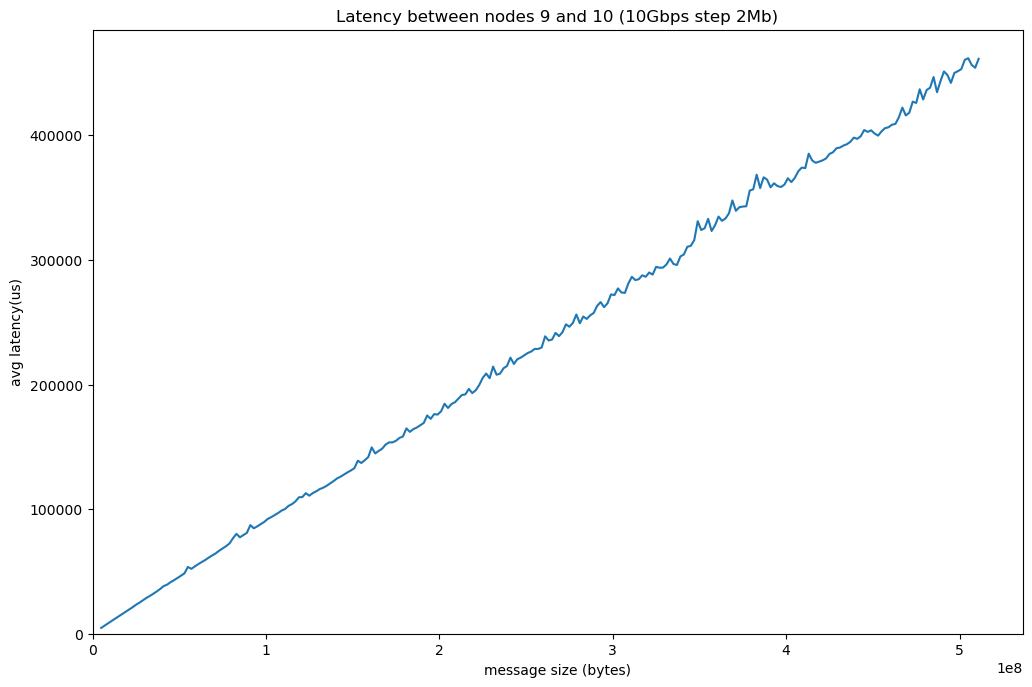

alpha=-569.1220799429462
beta=0.0009062896413707123
estimated bandwidth=1103.400010715731


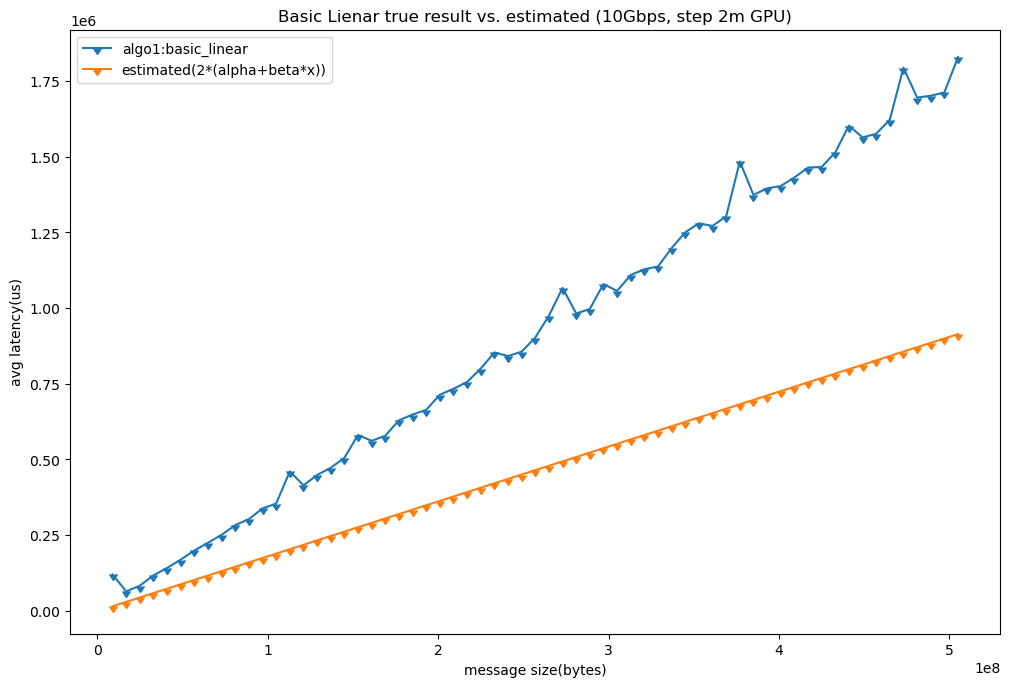

mse is:265549869360.82034


In [27]:

x = []
y = []

with open('data/gpus/lat-10g-step2m.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps step 2Mb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step2m.png')
plt.show()

# slope, intercept = np.polyfit(x,y,1)
A = np.vstack([x, np.ones(len(x))]).T
# print(np.linalg.lstsq(A,y,))
slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/10g-16p-algo1-step2m.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

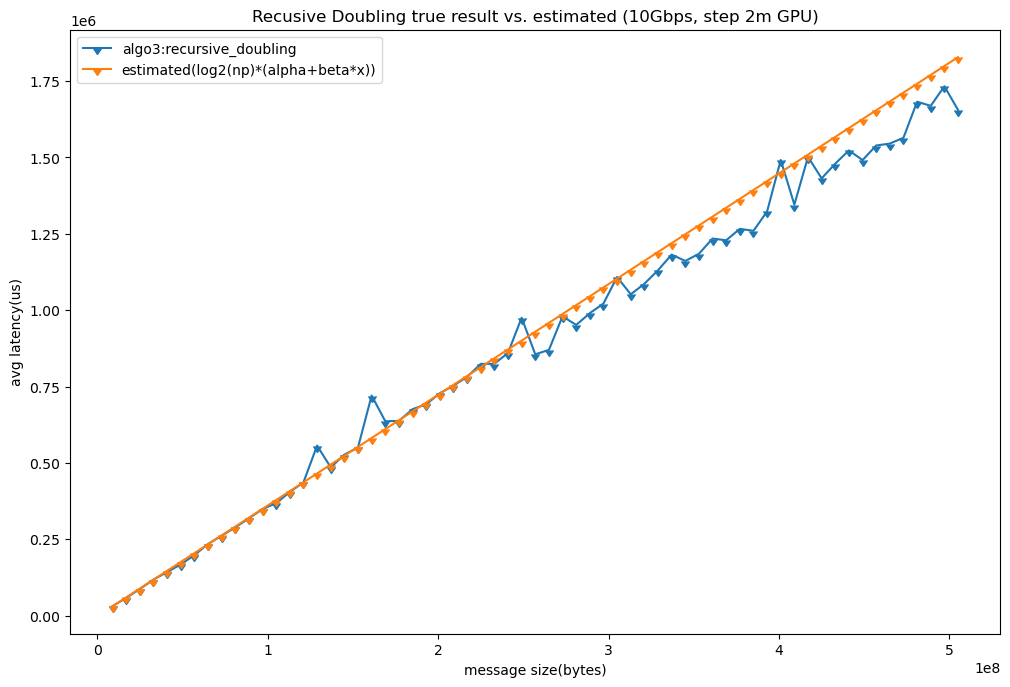

mse is:4920966219.563108


In [10]:
x, y1 = read_algo_with_head('data/gpus/10g-16p-algo3-step2m.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

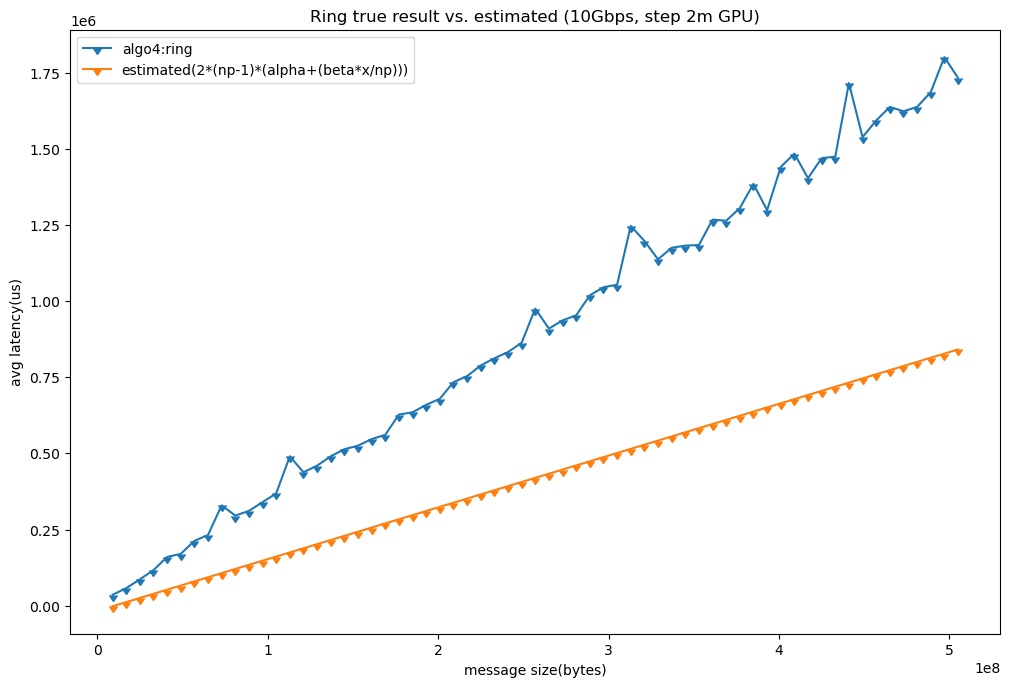

mse is:301899483114.4203


In [11]:


x, y1 = read_algo_with_head('data/gpus/10g-16p-algo4-step2m.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

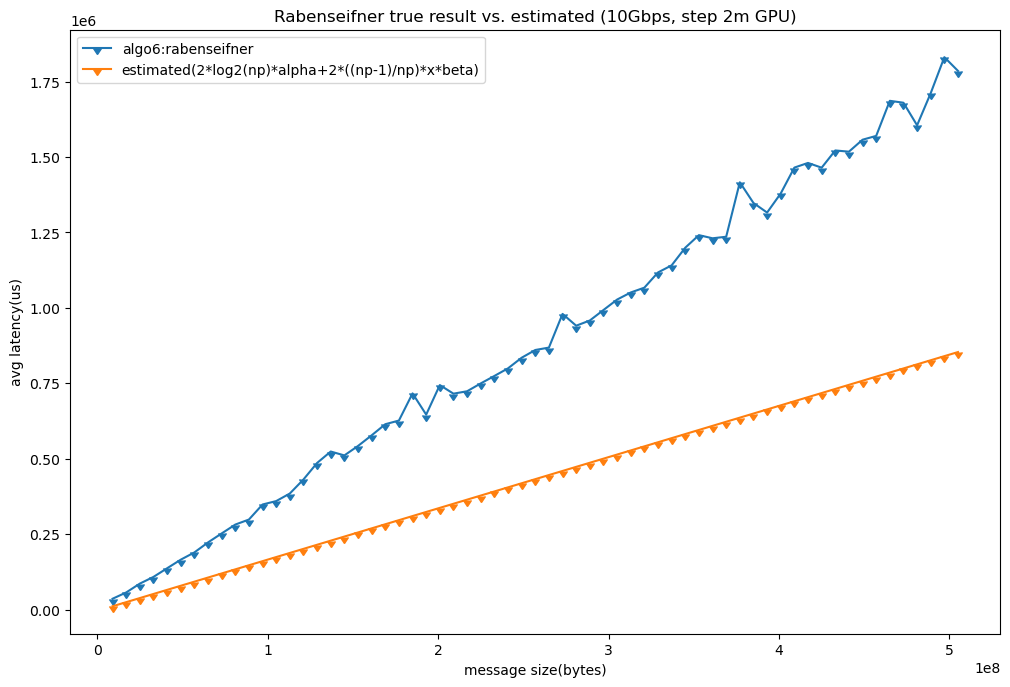

mse is:280568483990.08563


In [12]:


x, y1 = read_algo_with_head('data/gpus/10g-16p-algo6-step2m.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

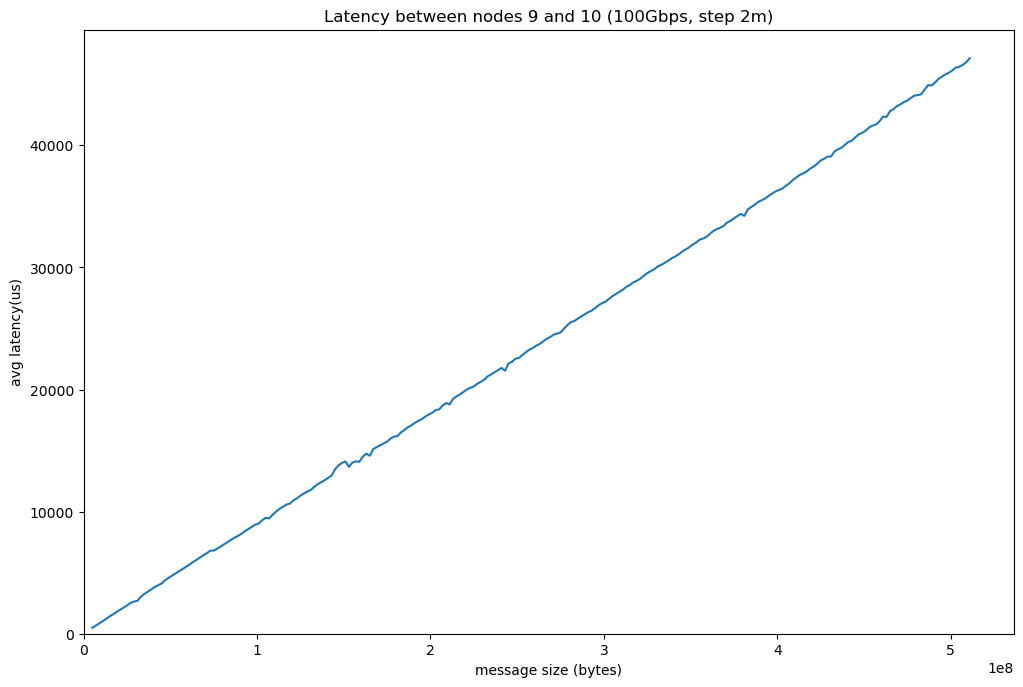

alpha=-145.80853611227047
beta=9.1496458496193e-05
estimated bandwidth=10929.384770030287


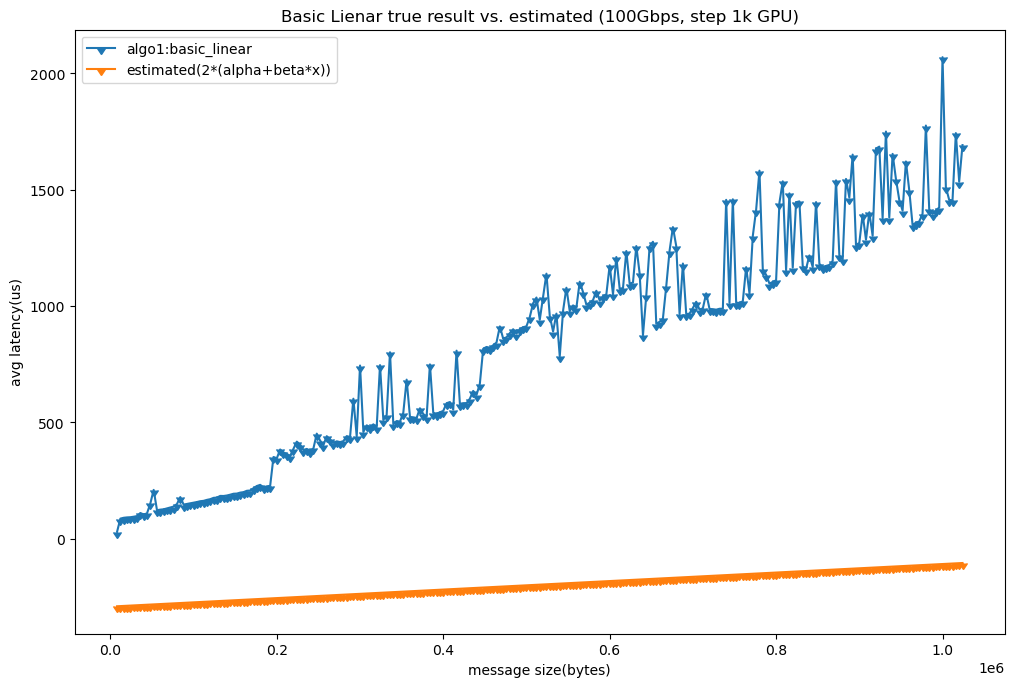

mse is:1235849.733792075


In [48]:

x = []
y = []

with open('data/gpus/lat-100g-step2m.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps, step 2m)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-100g-step2m.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo1-step1k.txt')


plt.title('Basic Lienar true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

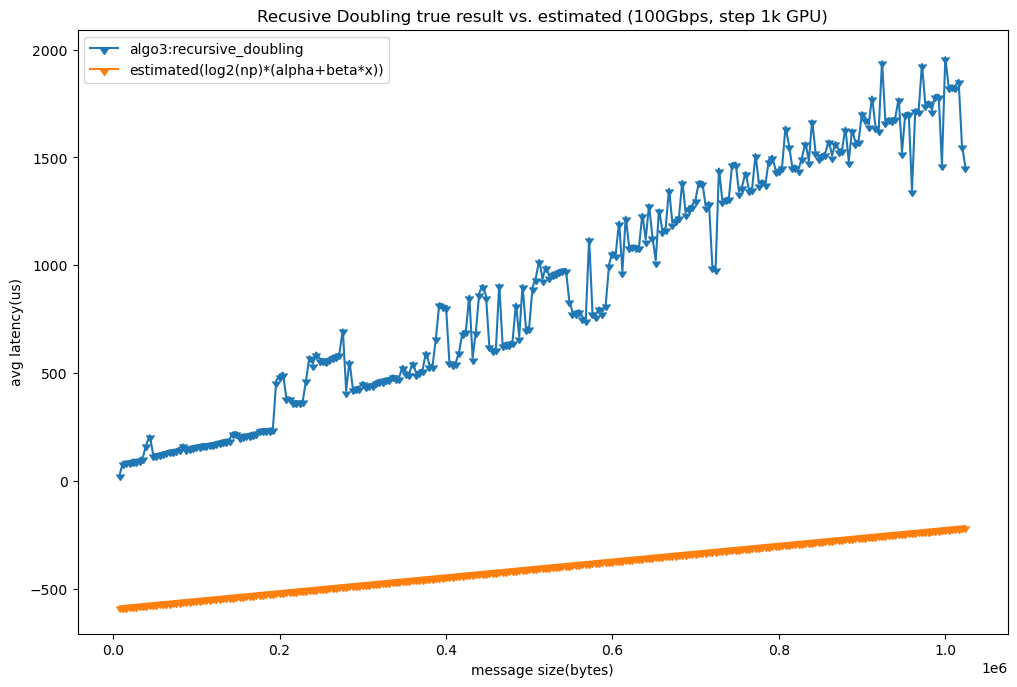

mse is:1875409.1031969239


In [49]:
x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo3-step1k.txt')


plt.title('Recusive Doubling true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

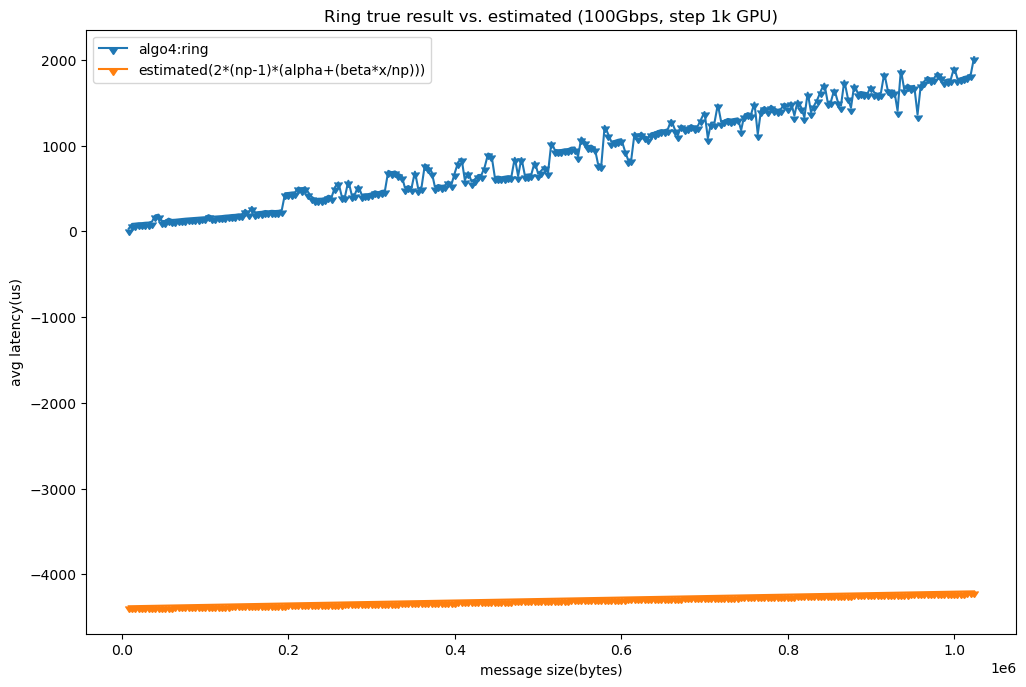

mse is:27236896.965307716


In [50]:


x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo4-step1k.txt')


plt.title('Ring true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

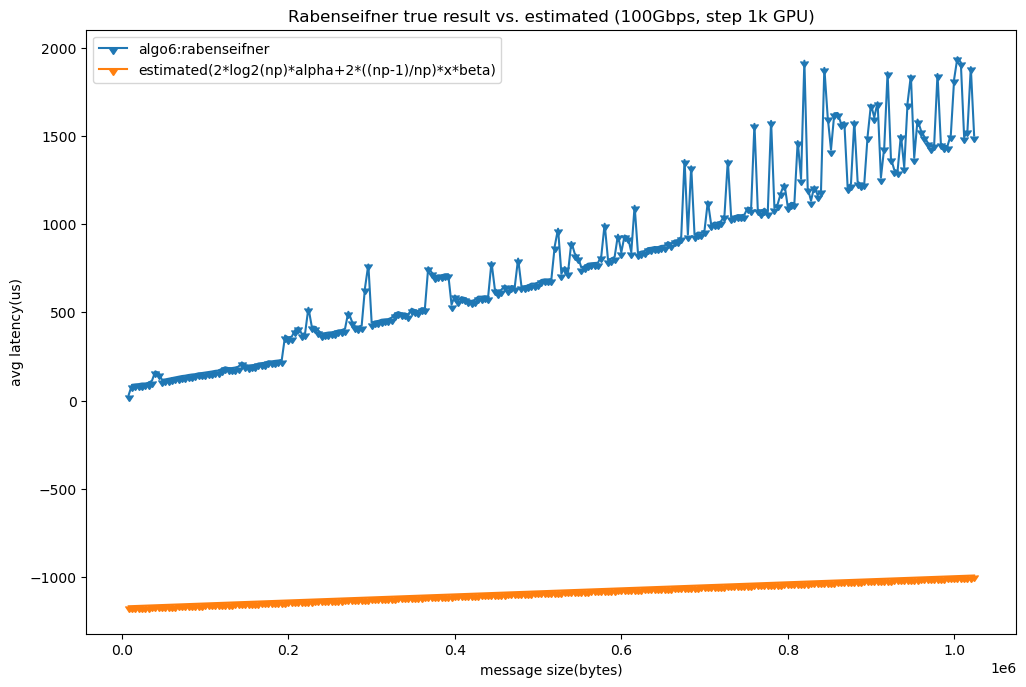

mse is:3714878.4256819175


In [51]:


x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo6-step1k.txt')


plt.title('Rabenseifner true result vs. estimated (100Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

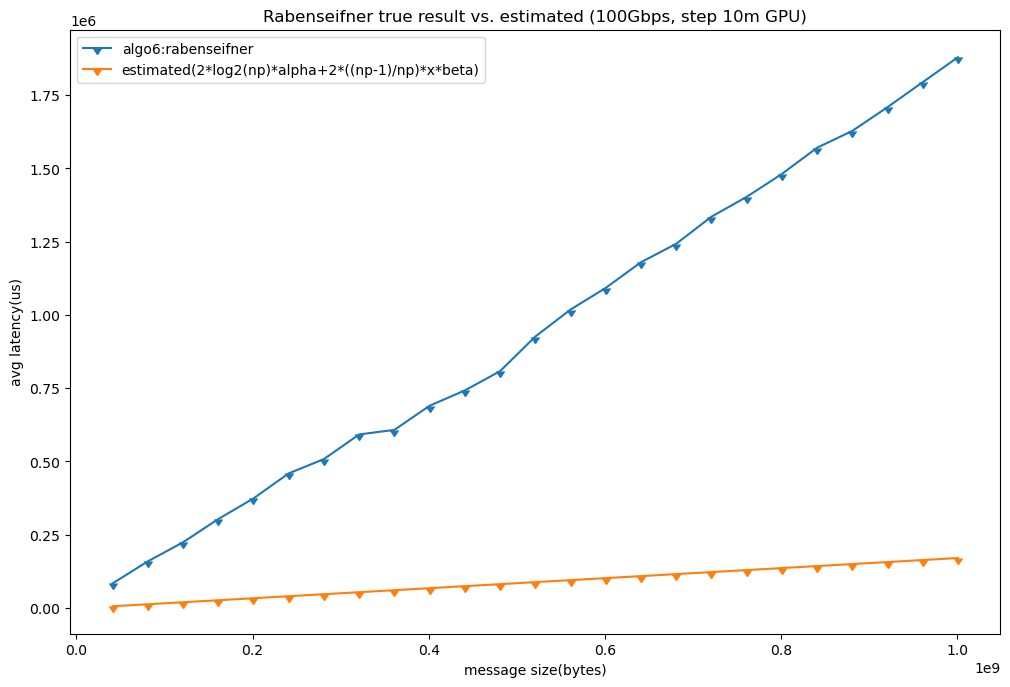

mse is:986963386373.2876


In [52]:


x, y1 = read_algo_with_head('data/gpus/100g-16cpu-algo6-step10m.txt')


plt.title('Rabenseifner true result vs. estimated (100Gbps, step 10m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

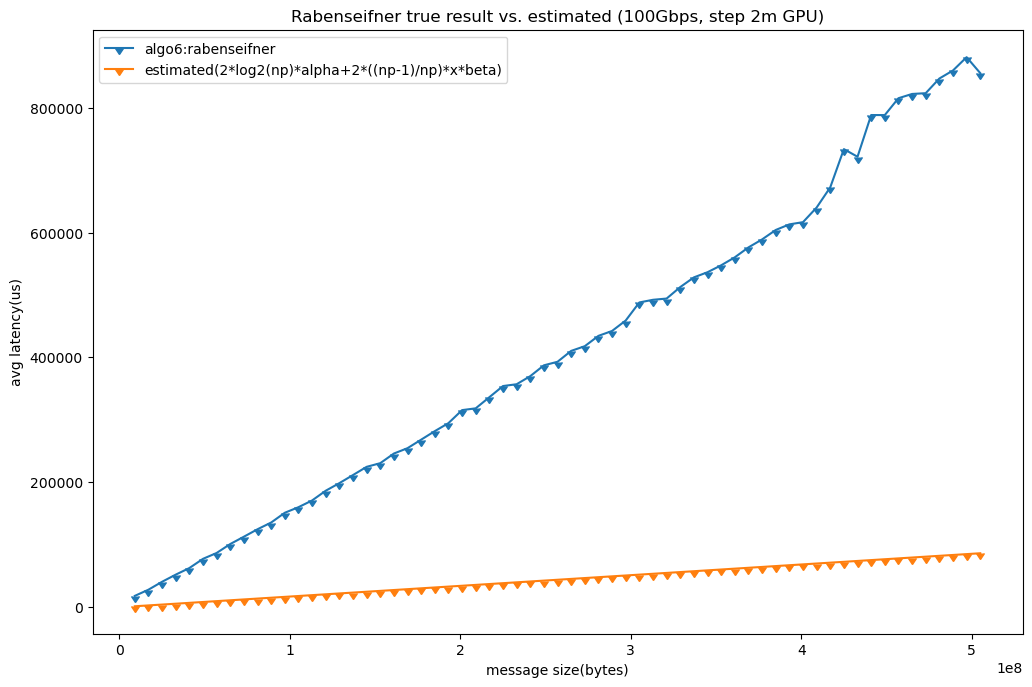

mse is:189491425370.87543


In [53]:


x, y1 = read_algo_with_head('data/gpus/100g-16p-algo6-step2m.txt')


plt.title('Rabenseifner true result vs. estimated (100Gbps, step 2m GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

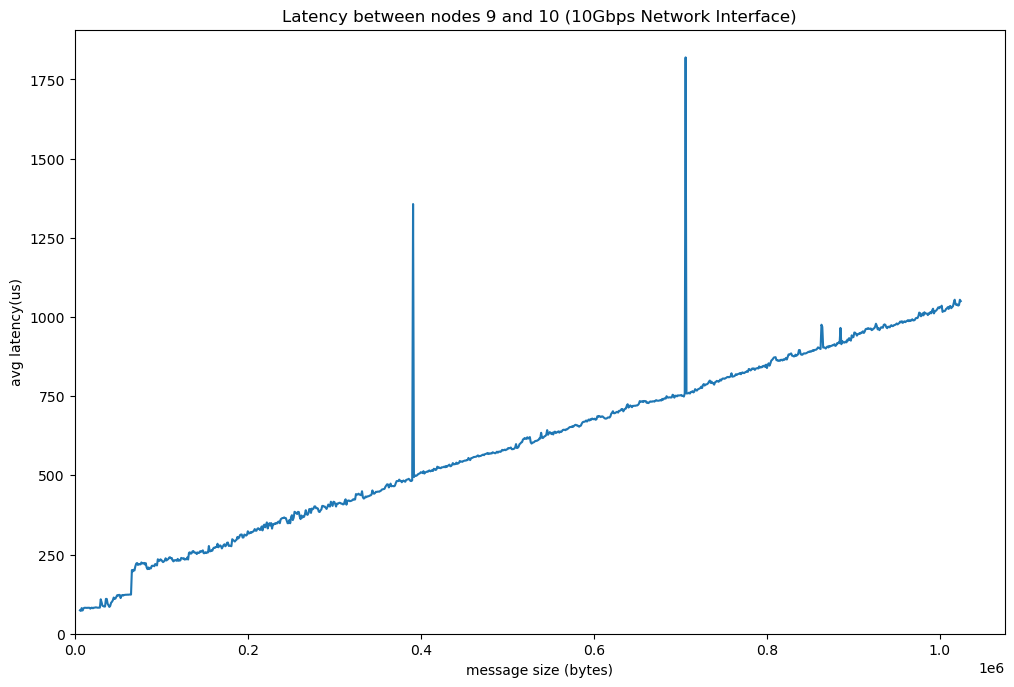

alpha=125.03667799501609
beta=0.0009123100414895223
estimated bandwidth=1096.1185940333473


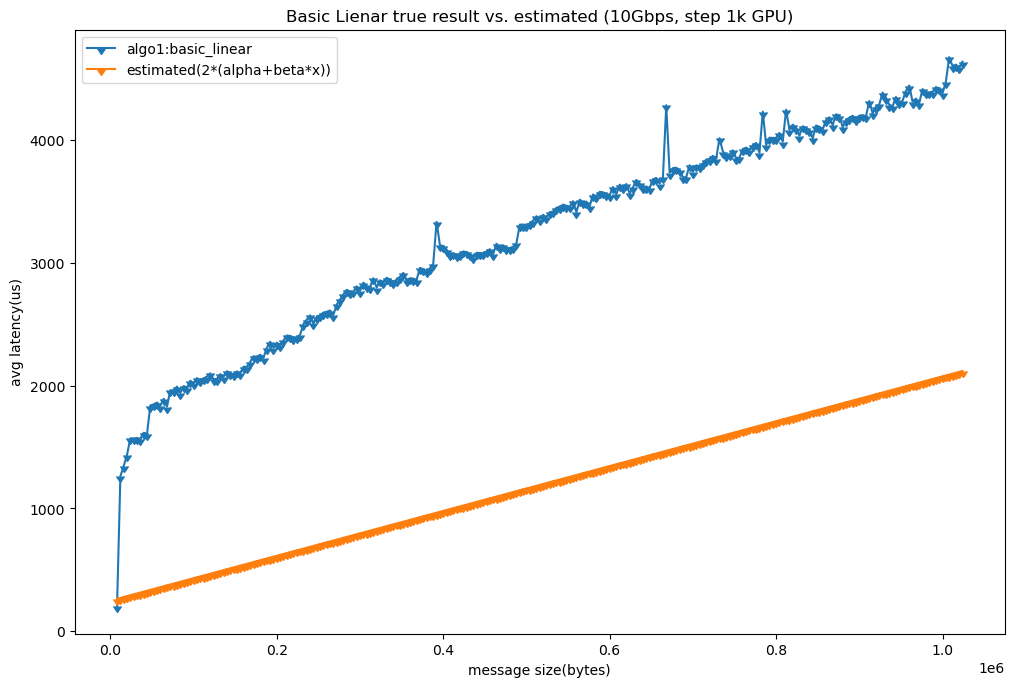

mse is:4299599.434380407


In [14]:
x = []
y = []

with open('data/gpus/lat-10g-step1k.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Network Interface)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus-2/10g-16p-algo1-step1k.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

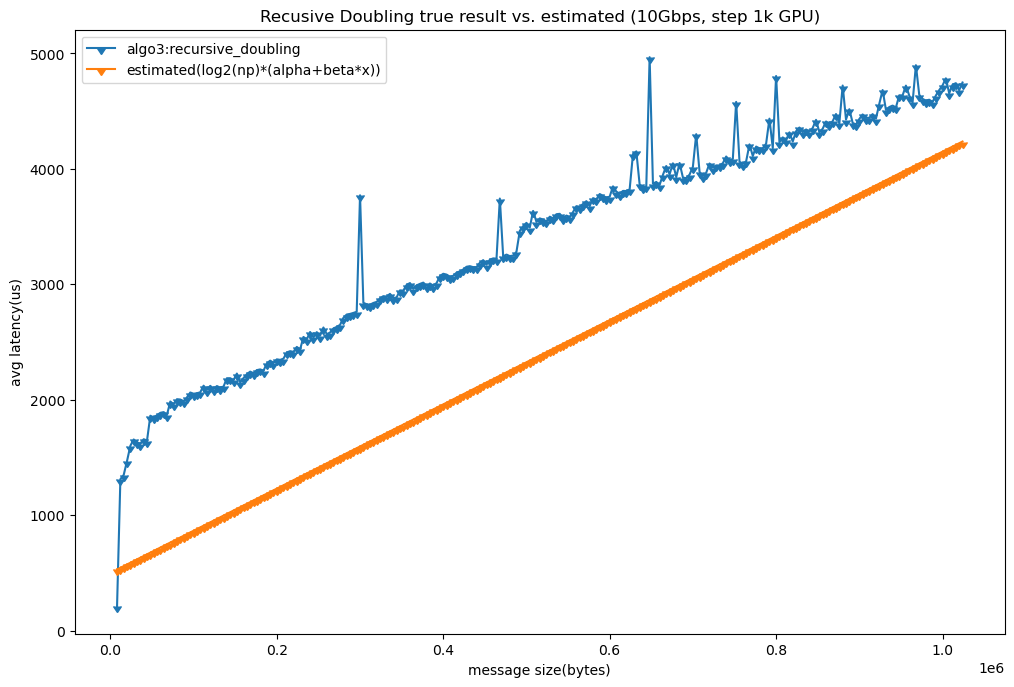

mse is:1060053.2546401222


In [15]:
x, y1 = read_algo_with_head('data/gpus-2/10g-16p-algo3-step1k.txt')


plt.title('Recusive Doubling true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

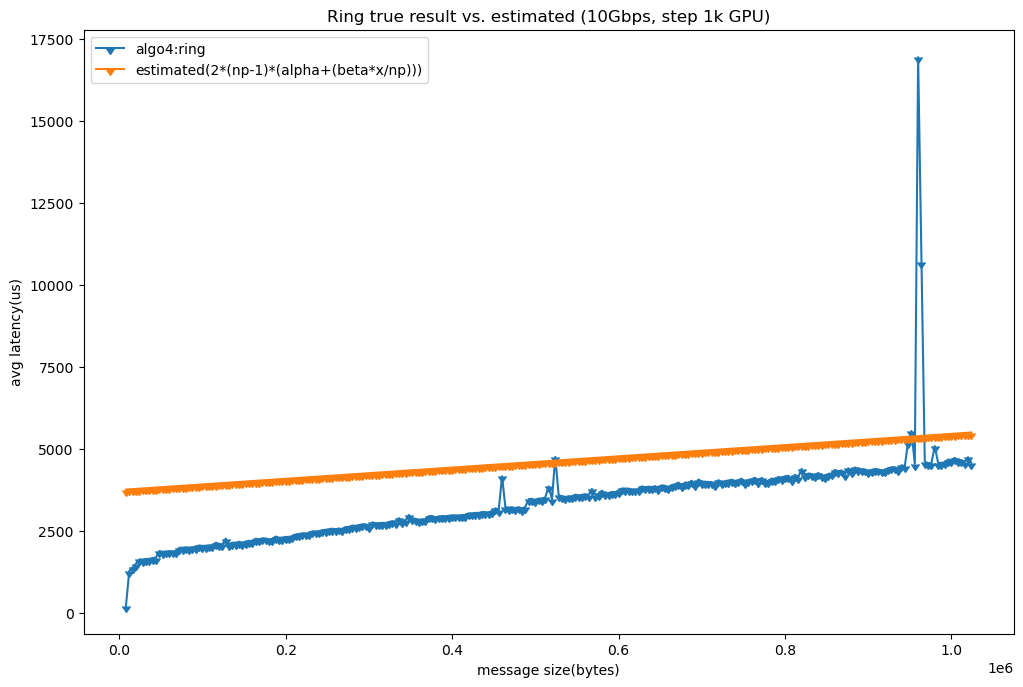

mse is:2502988.8634119215


In [16]:


x, y1 = read_algo_with_head('data/gpus-2/10g-16p-algo4-step1k.txt')


plt.title('Ring true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

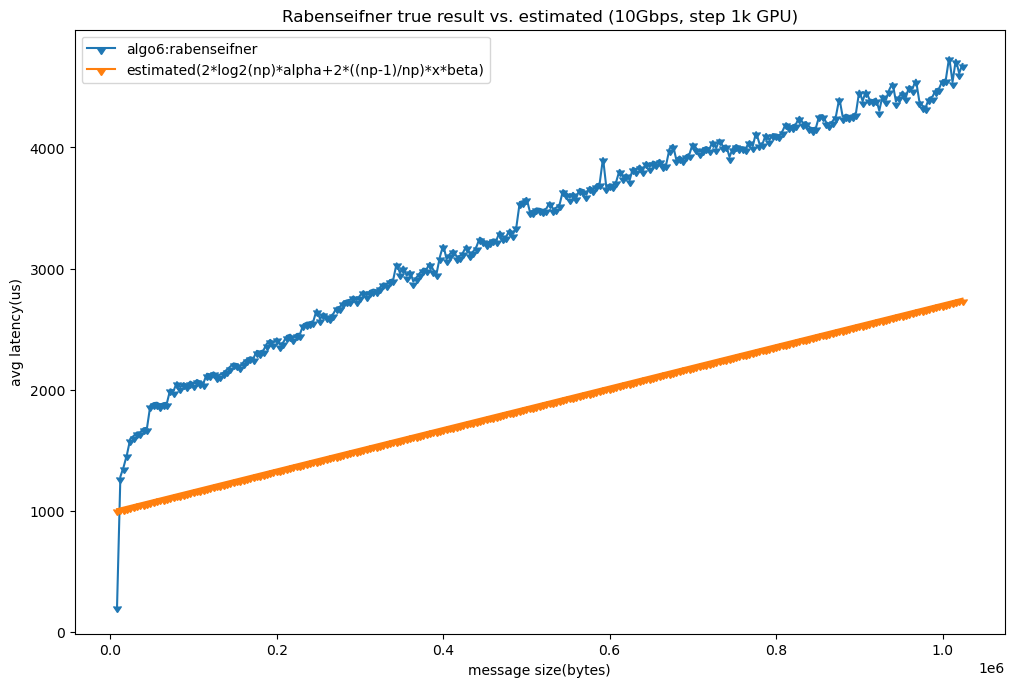

mse is:2243716.781804643


In [17]:


x, y1 = read_algo_with_head('data/gpus-2/10g-16p-algo6-step1k.txt')


plt.title('Rabenseifner true result vs. estimated (10Gbps, step 1k GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

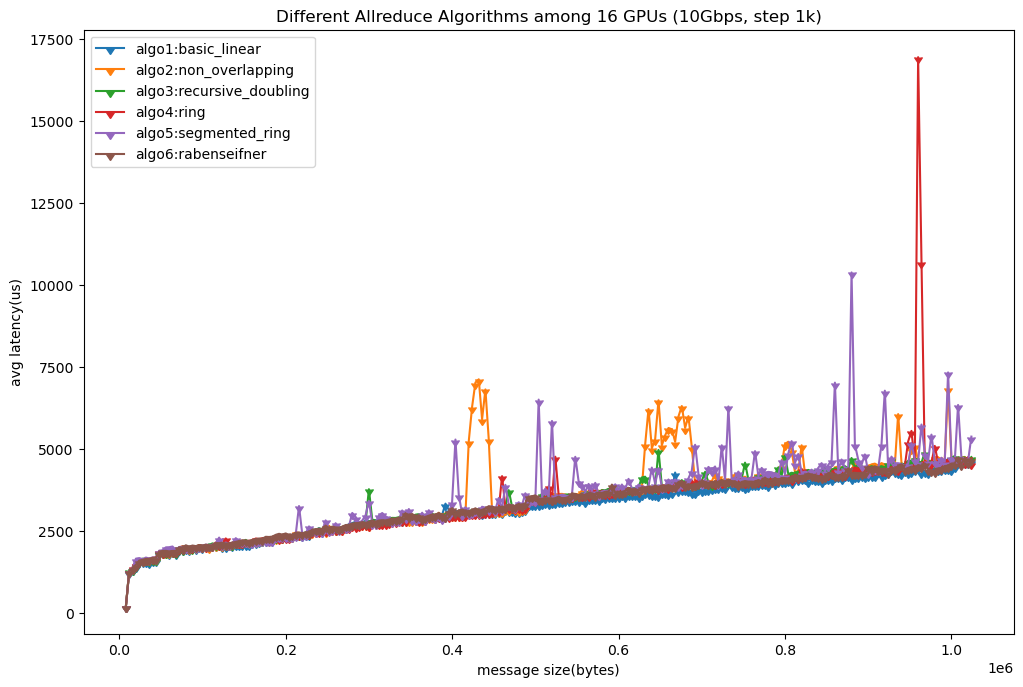

In [18]:
x, y1 = read_algo_with_head('data/gpus-2/10g-16p-algo1-step1k.txt')
_, y2 = read_algo_with_head('data/gpus-2/10g-16p-algo2-step1k.txt')
_, y3 = read_algo_with_head('data/gpus-2/10g-16p-algo3-step1k.txt')
_, y4 = read_algo_with_head('data/gpus-2/10g-16p-algo4-step1k.txt')
_, y5 = read_algo_with_head('data/gpus-2/10g-16p-algo5-step1k.txt')
_, y6 = read_algo_with_head('data/gpus-2/10g-16p-algo6-step1k.txt')

plt.title('Different Allreduce Algorithms among 16 GPUs (10Gbps, step 1k)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)
plt.plot(x, y2, label='algo2:non_overlapping', marker=11)
plt.plot(x, y3, label='algo3:recursive_doubling', marker=11)
plt.plot(x, y4, label='algo4:ring', marker=11)
plt.plot(x, y5, label='algo5:segmented_ring', marker=11)
plt.plot(x, y6, label='algo6:rabenseifner', marker=11)

plt.legend()
plt.show()

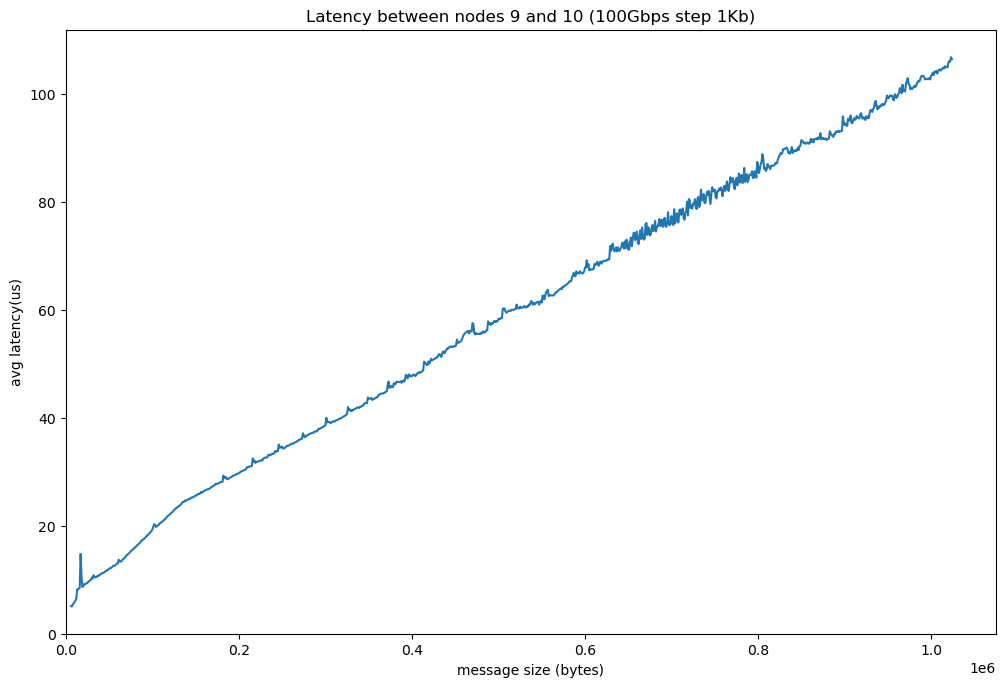

alpha=10.058235027599386
beta=9.457613786003079e-05
estimated bandwidth=10573.491608210554


In [3]:
x = []
y = []

with open('data/gpus/lat-100g-step1k.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

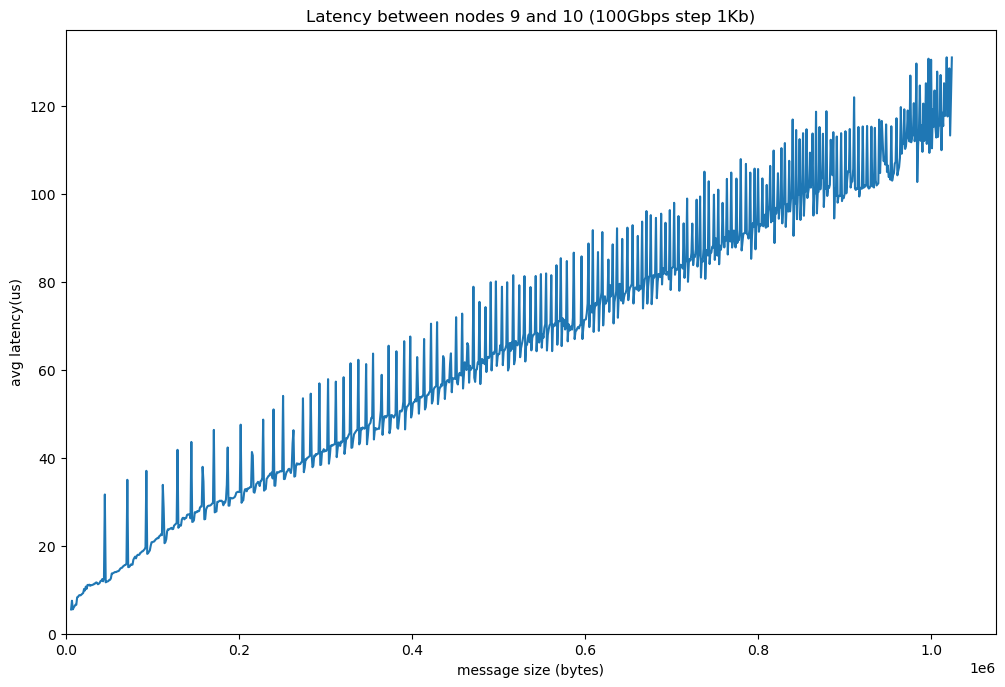

alpha=10.935095876259304
beta=0.00010563918043025579
estimated bandwidth=9466.184761440965


In [34]:
x = []
y = []

with open('data/gpus-2/lat-100g-step1k-1.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

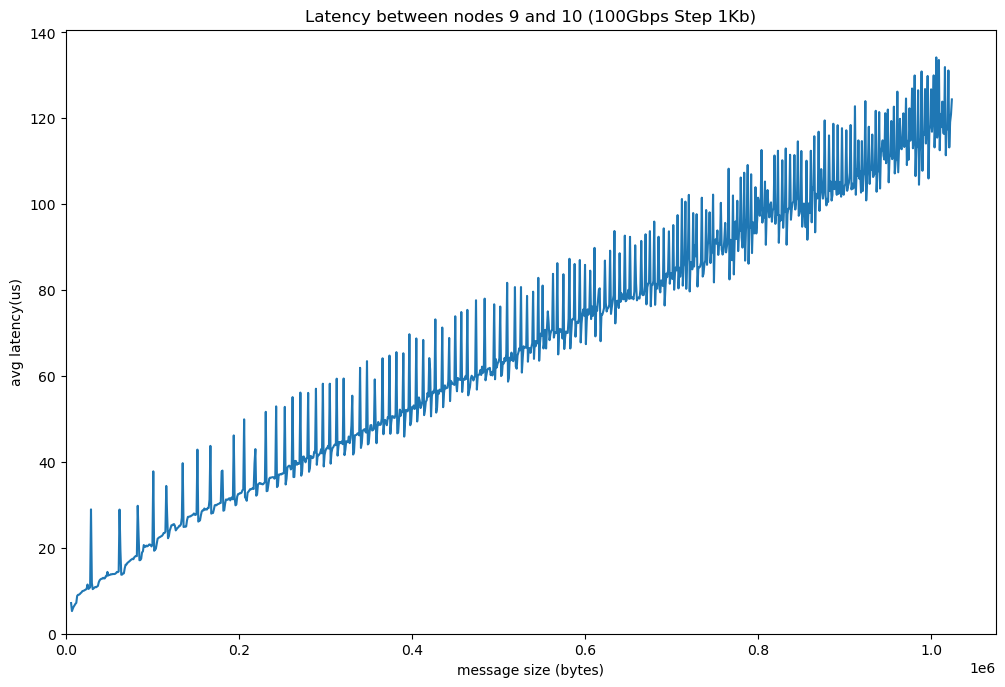

alpha=10.747489982032128
beta=0.00010758439686406682
estimated bandwidth=9295.0281746107


In [35]:
x = []
y = []

with open('data/gpus-2/lat-100g-step1k-2.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

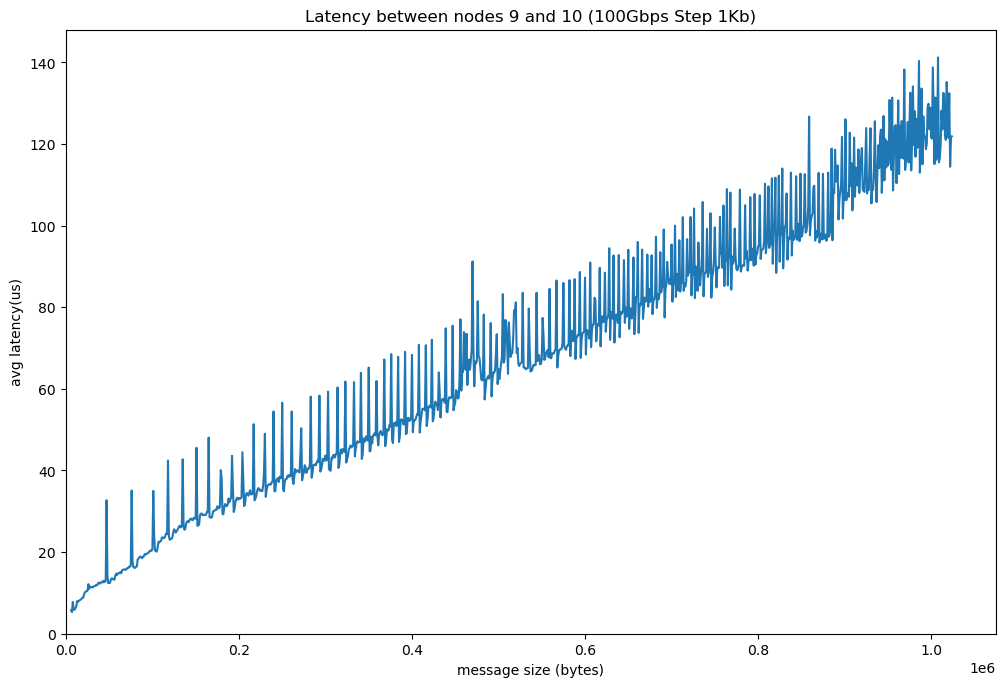

alpha=10.383777616820907
beta=0.00011043648467174084
estimated bandwidth=9054.978551448643


In [36]:
x = []
y = []

with open('data/gpus-2/lat-100g-step1k-3.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

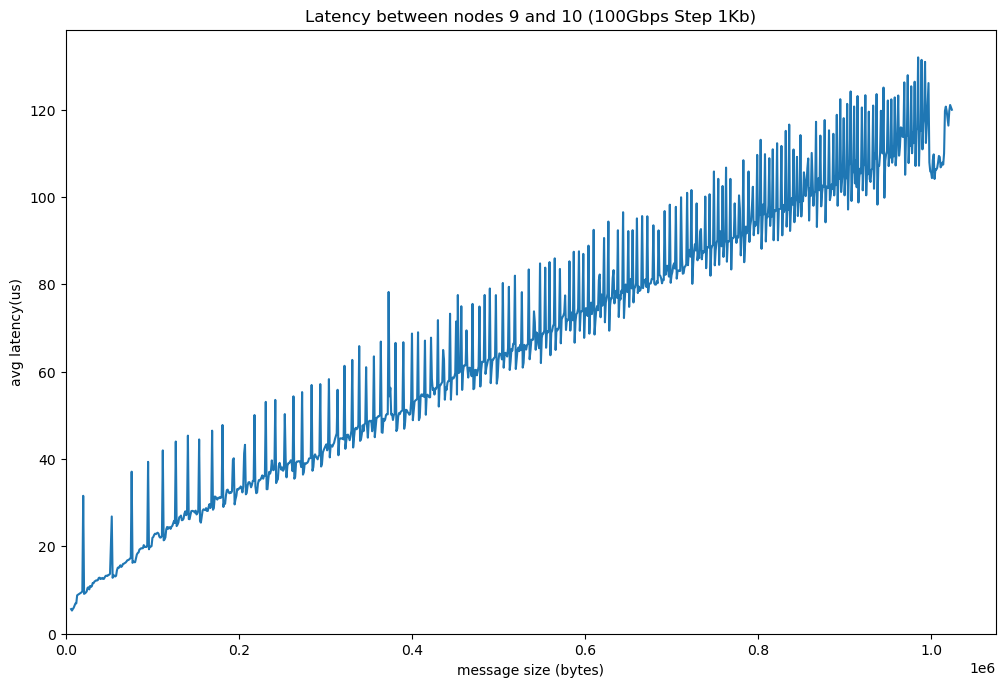

alpha=11.800659177352248
beta=0.00010530283506250762
estimated bandwidth=9496.420484846409


In [37]:
x = []
y = []

with open('data/gpus-2/lat-100g-step1k-4.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

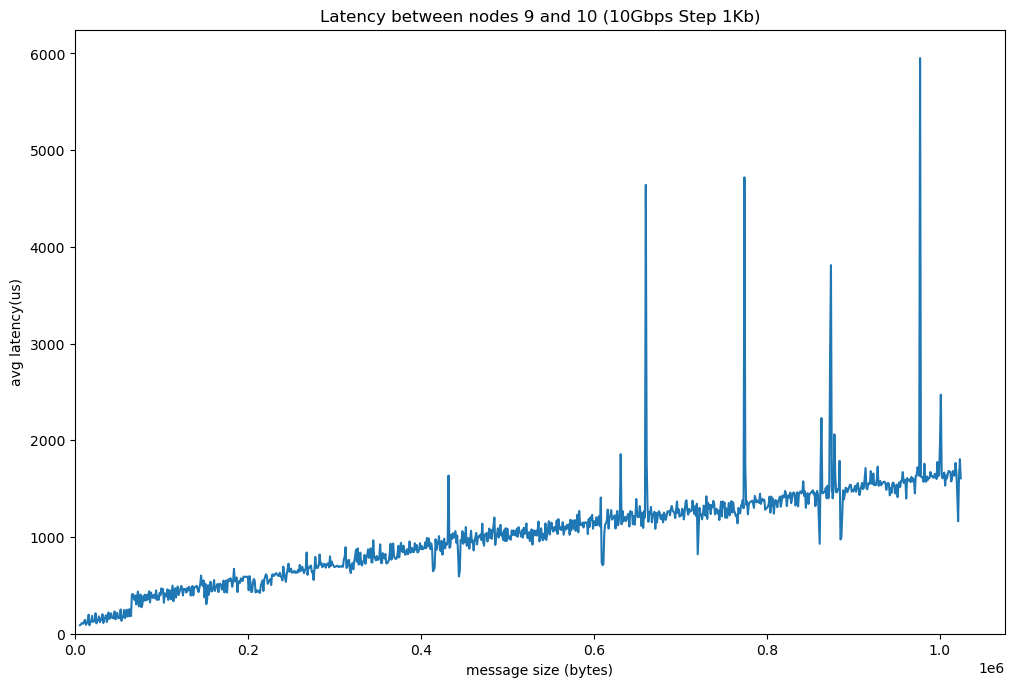

alpha=247.73185056559154
beta=0.0014703711506115127
estimated bandwidth=680.100394777271


In [38]:
x = []
y = []

with open('data/gpus-2/lat-10g-step1k-1.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

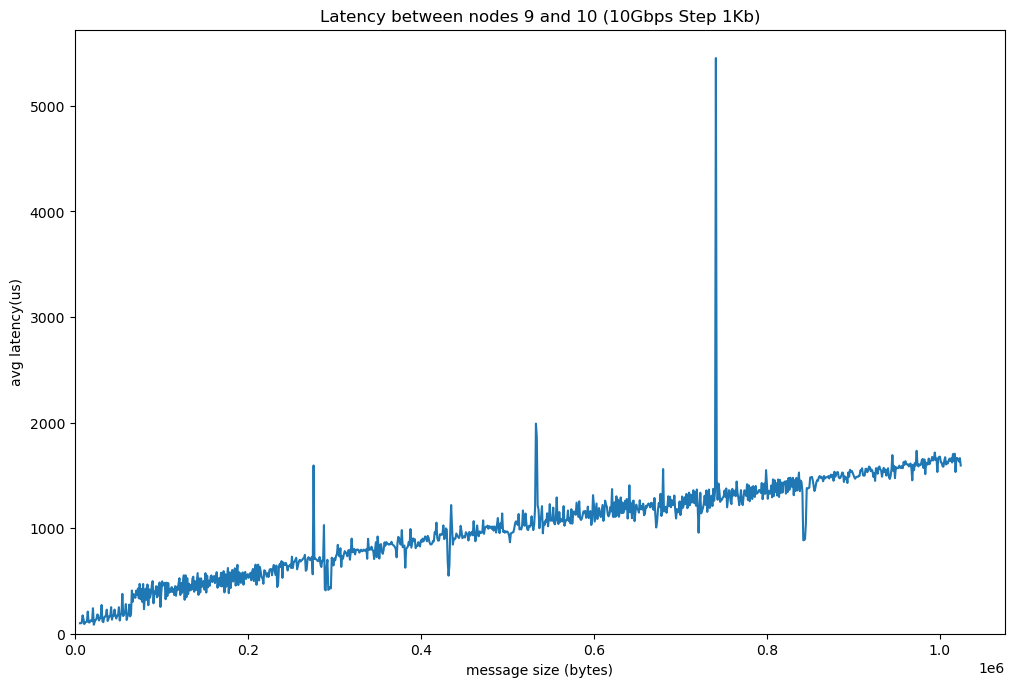

alpha=269.12961919757123
beta=0.001405100065813
estimated bandwidth=711.6930845927998


In [39]:
x = []
y = []

with open('data/gpus-2/lat-10g-step1k-2.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

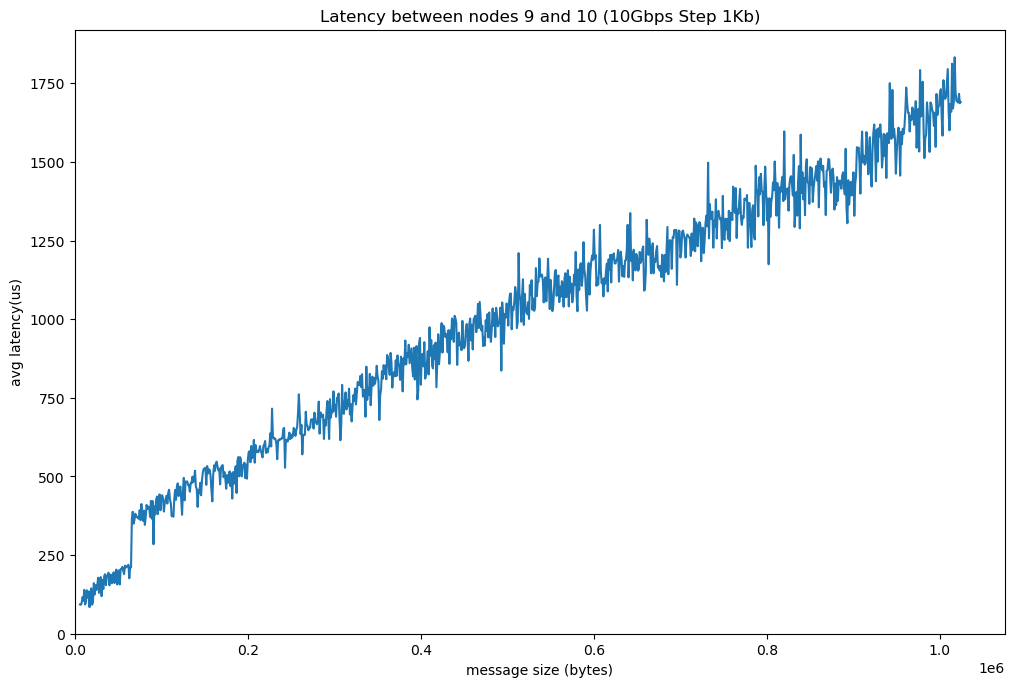

alpha=263.5505165322412
beta=0.0014173892234984732
estimated bandwidth=705.5225081588728


In [40]:
x = []
y = []

with open('data/gpus-2/lat-10g-step1k-3.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

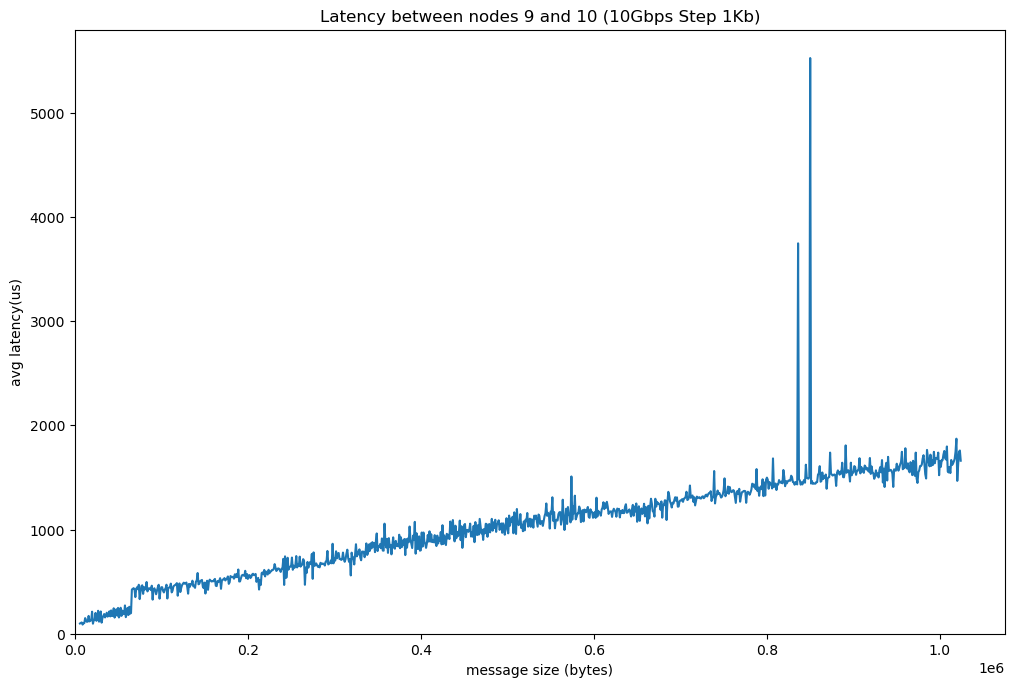

alpha=264.5037812329635
beta=0.0014638132319399577
estimated bandwidth=683.1472609895206


In [41]:
x = []
y = []

with open('data/gpus-2/lat-10g-step1k-4.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

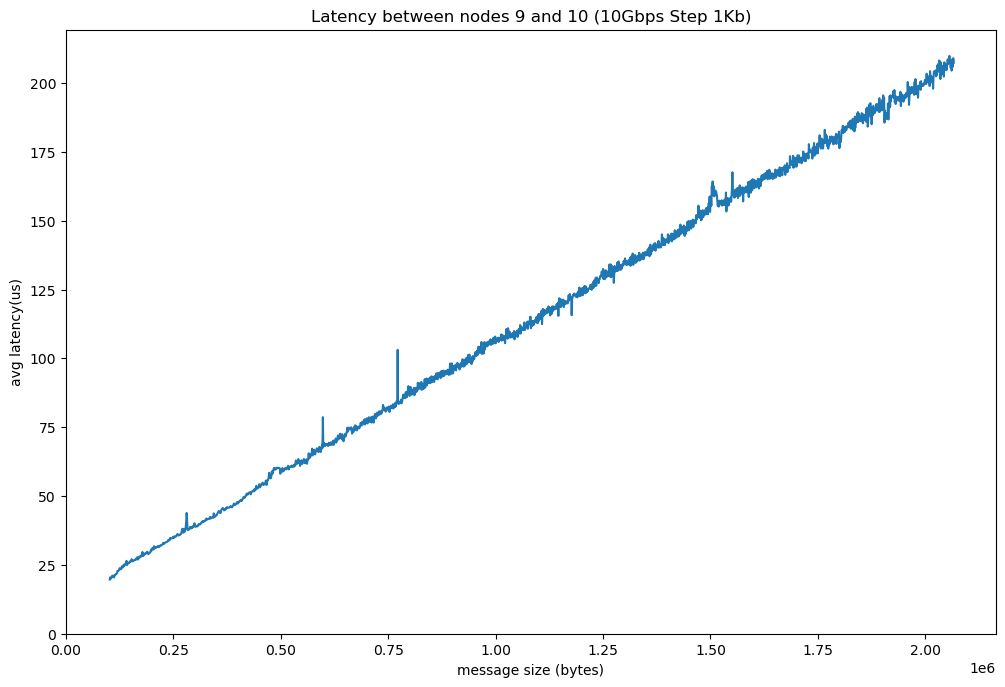

alpha=10.927472067745322
beta=9.486666450094384e-05
estimated bandwidth=10541.110570932437


In [56]:
x = []
y = []

with open('data/gpus-3/lat-100g-step2m.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

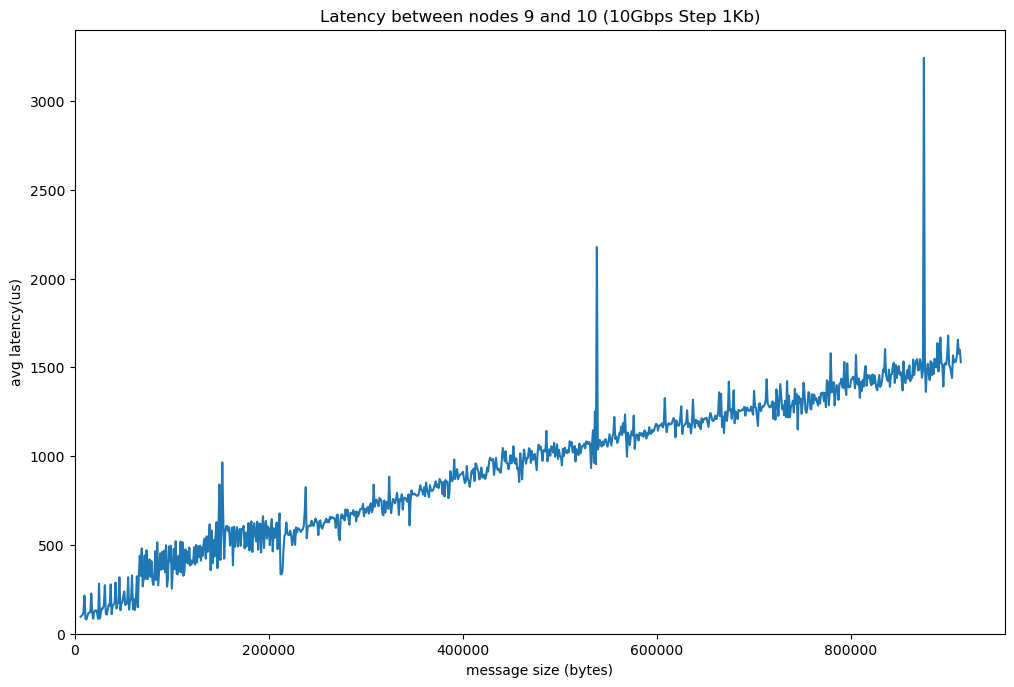

alpha=246.44760496527925
beta=0.0014859728652853047
estimated bandwidth=672.959798500763


In [57]:
x = []
y = []

with open('data/gpus-3/lat-10g-step1k-1.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps Step 1Kb)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-10g-step1k-modified.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))

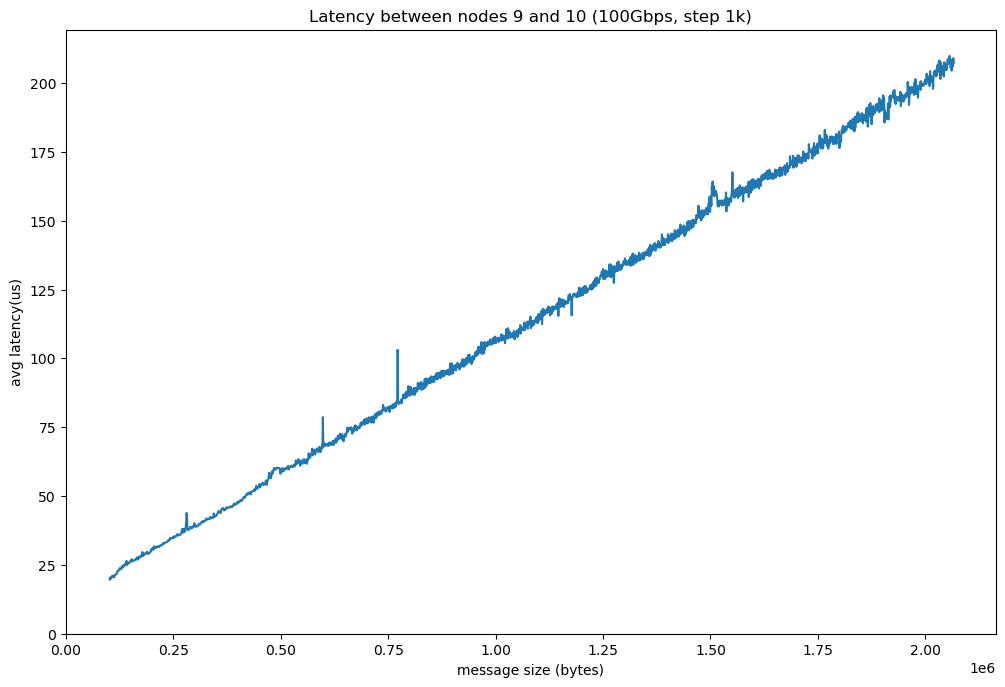

alpha=10.927472067745322
beta=9.486666450094384e-05
estimated bandwidth=10541.110570932437


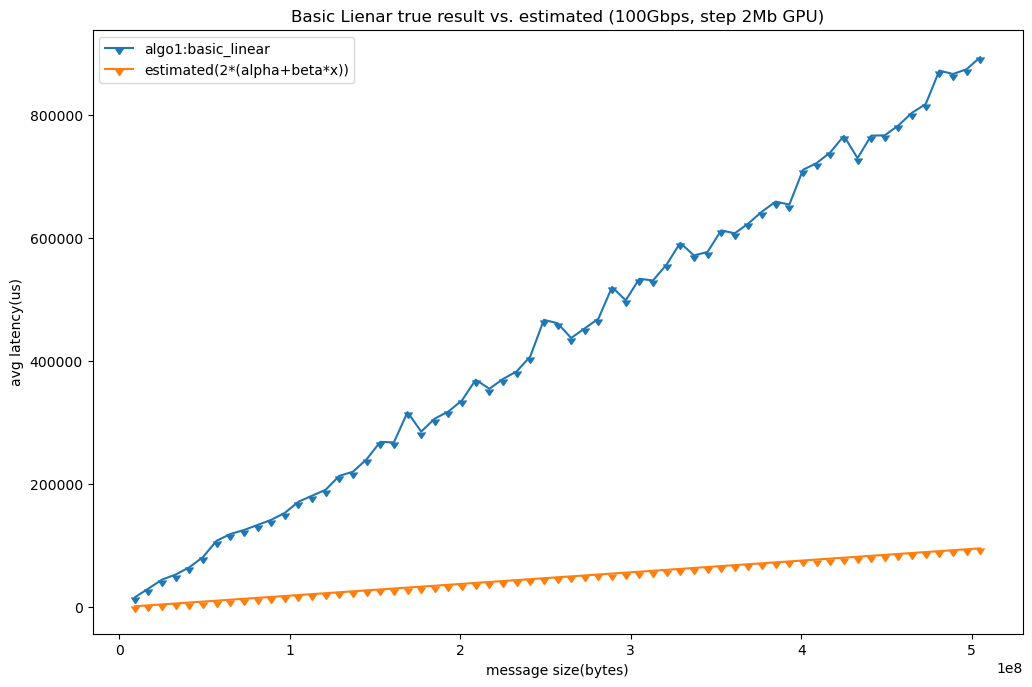

mse is:206858555273.37653


In [67]:

x = []
y = []

with open('data/gpus-3/lat-100g-step2m.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps, step 1k)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-100g-step2m.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus-2/100g-16p-algo1-step2m.txt')


plt.title('Basic Lienar true result vs. estimated (100Gbps, step 2Mb GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# reduce+braodcast
# x2 = [2**x for x in range(2,29)]
y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)

plt.plot(x, y2, label='estimated(2*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

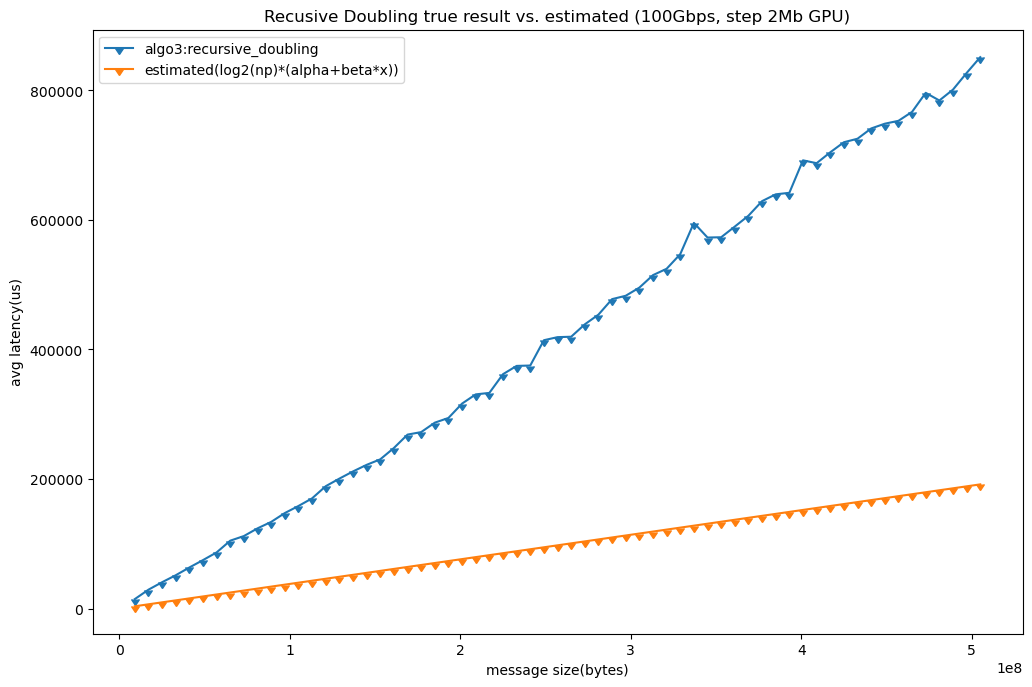

mse is:140770200550.5666


In [68]:
x, y1 = read_algo_with_head('data/gpus/100g-16p-algo3-step2m.txt')


plt.title('Recusive Doubling true result vs. estimated (100Gbps, step 2Mb GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo3:recursive_doubling', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# recursive doubling
y2 = np.log2(num_processes)*(alpha+beta*x)

plt.plot(x, y2, label='estimated(log2(np)*(alpha+beta*x))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

10.927472067745322 9.486666450094384e-05


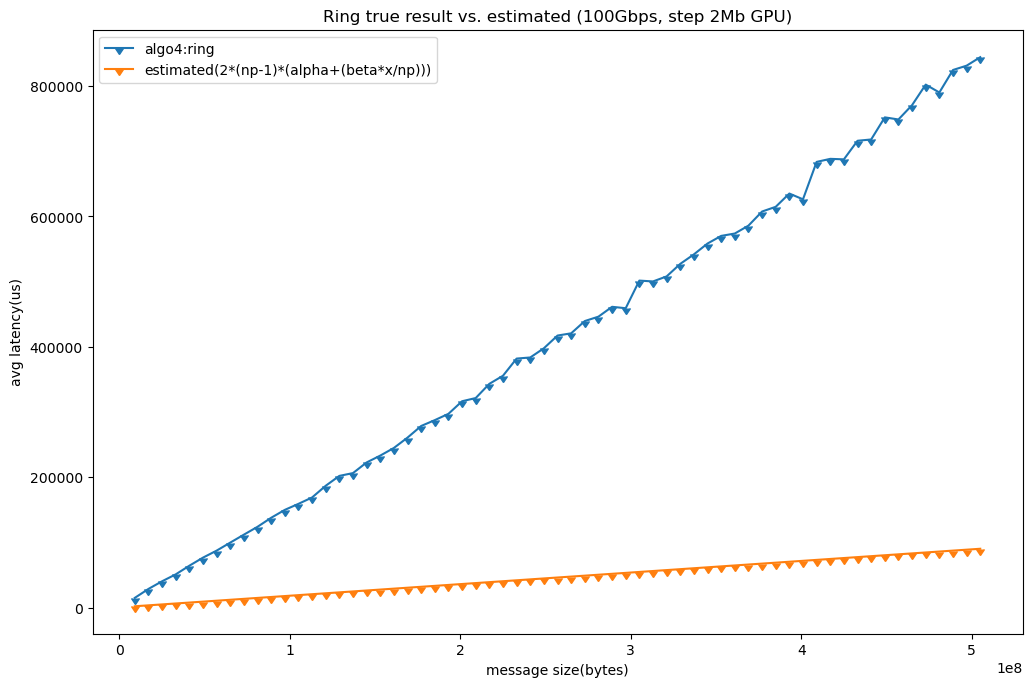

mse is:182531405904.92032


In [69]:


x, y1 = read_algo_with_head('data/gpus/100g-16p-algo4-step2m.txt')


plt.title('Ring true result vs. estimated (100Gbps, step 2Mb GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

print(alpha,beta)
# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

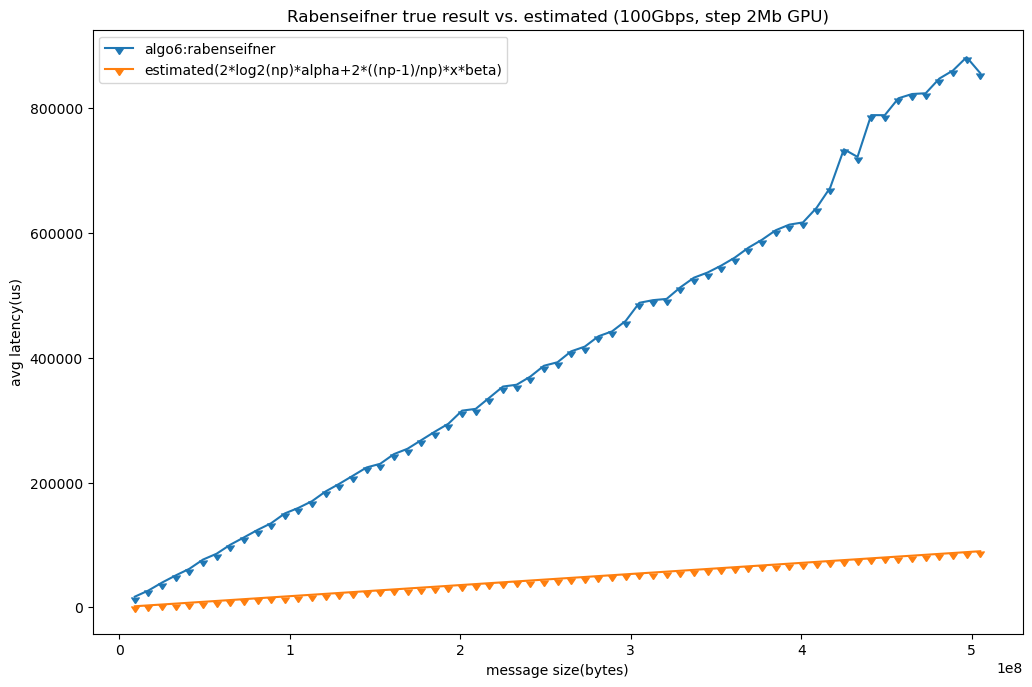

mse is:186947829666.08368


In [66]:


x, y1 = read_algo_with_head('data/gpus/100g-16p-algo6-step2m.txt')


plt.title('Rabenseifner true result vs. estimated (100Gbps, step 2Mb GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo6:rabenseifner', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# # ring
# y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# rabenseifner
y2 = 2*np.log2(num_processes)*alpha+2*((num_processes-1)/num_processes)*x*beta

plt.plot(x, y2, label='estimated(2*log2(np)*alpha+2*((np-1)/np)*x*beta)', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

10.927472067745322 9.486666450094384e-05


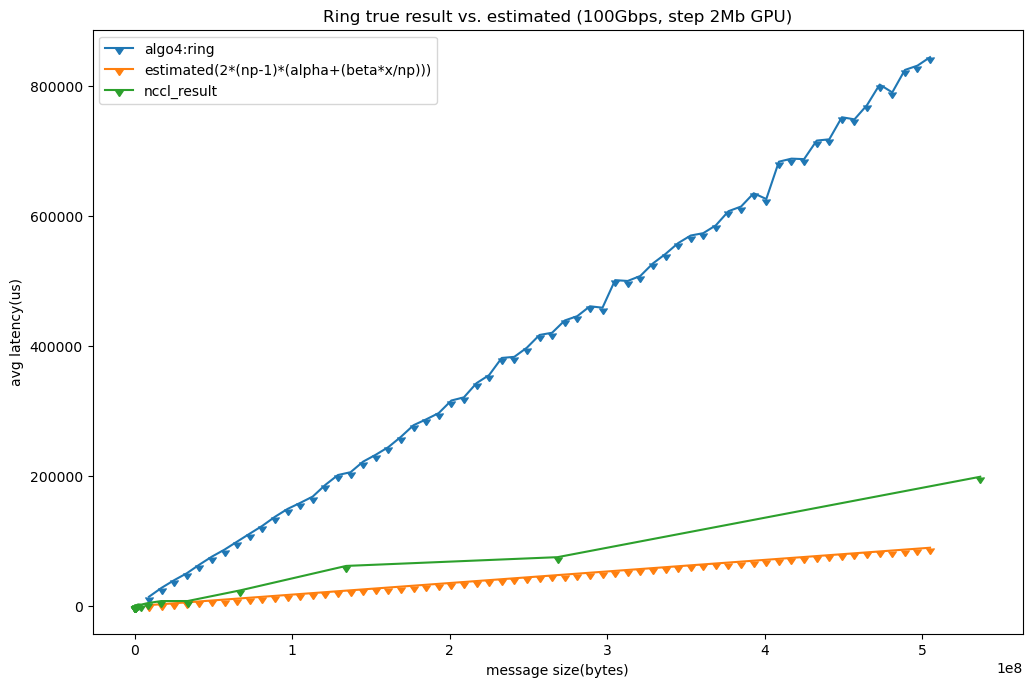

mse is:182531405904.92032


In [83]:
x3 = []
y3 = []

with open('data/nccl/test.txt') as f:
    for line in f:
        num = line.split()
#         print(num[0])
#         print(num[4])
        x3.append(float(num[0]))
        y3.append(float(num[4]))
        
        


x, y1 = read_algo_with_head('data/gpus/100g-16p-algo4-step2m.txt')


plt.title('Ring true result vs. estimated (100Gbps, step 2Mb GPU)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha=10.927472067745322
beta=9.486666450094384e-05


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# print(alpha,beta)
# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.plot(x3, y3, label='nccl_result', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))
        


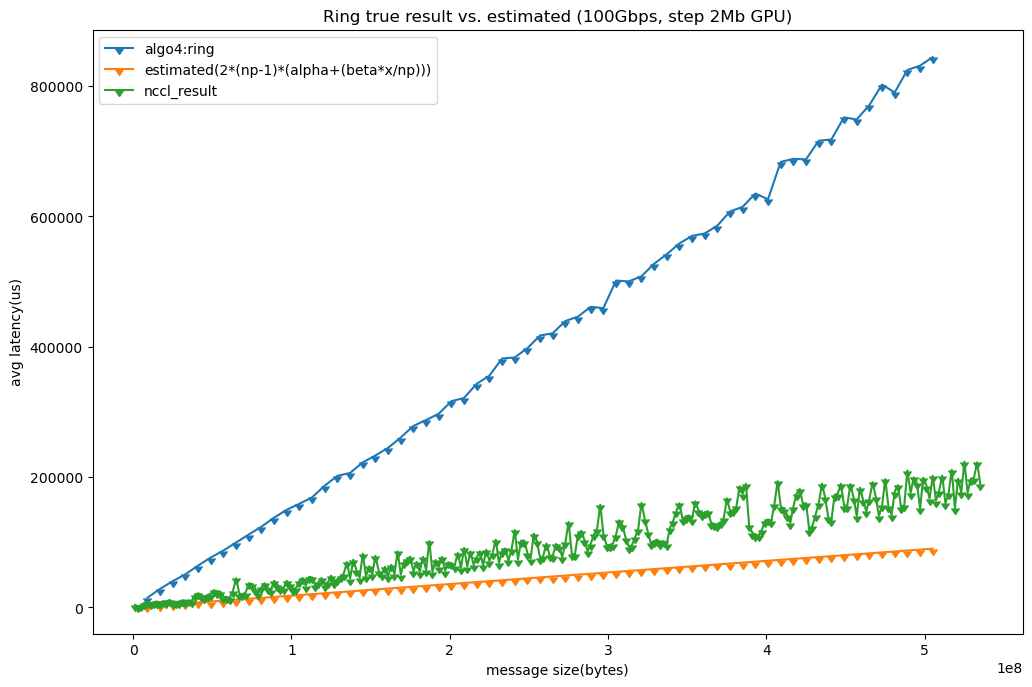

mse is:182531405904.92032


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')


def read_algo_skip_head(filename,skip_num=215):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(int(skip_num)):
            next(f)
    
        for line in f:
            if not line.startswith('#'):
                num = line.split()
                x.append(num[0])
                y.append(num[4])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x3, y3 = read_algo_skip_head('data/nccl-results/100g-step2m.txt', 215)


x, y1 = read_algo_with_head('data/gpus/100g-16p-algo4-step2m.txt')


plt.title('Ring true result vs. estimated (100Gbps, step 2Mb 16 GPUs)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo4:ring', marker=11)


# plt.legend()
# plt.show()


alpha=10.927472067745322
beta=9.486666450094384e-05


# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# print(alpha,beta)
# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.plot(x3, y3, label='nccl_result', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))
        

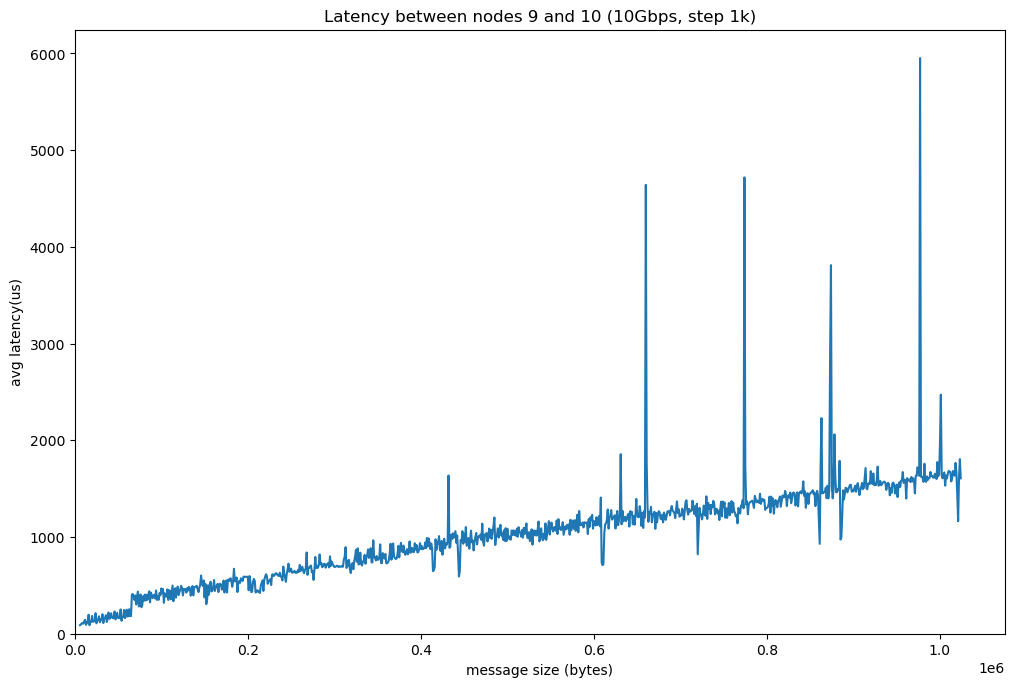

alpha=247.73185056559154
beta=0.0014703711506115127
estimated bandwidth=680.100394777271


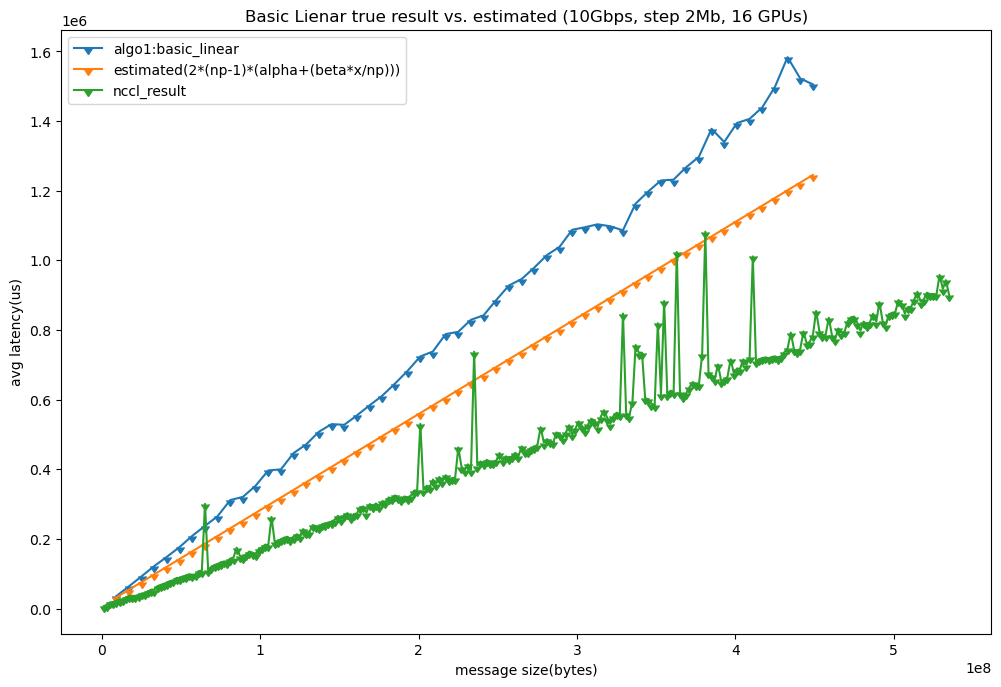

mse is:36257858366.14943


In [15]:

x = []
y = []

with open('data/gpus-2/lat-10g-step1k-1.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)

def read_algo_skip_head(filename,skip_num=215):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(int(skip_num)):
            next(f)
    
        for line in f:
            if not line.startswith('#'):
                num = line.split()
                x.append(num[0])
                y.append(num[4])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x3, y3 = read_algo_skip_head('data/nccl-results/10g-step2m.txt', 215)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (10Gbps, step 1k)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-100g-step2m.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus-2/10g-16p-algo4-step2m.txt')


plt.title('Basic Lienar true result vs. estimated (10Gbps, step 2Mb, 16 GPUs)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope

# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# print(alpha,beta)
# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.plot(x3, y3, label='nccl_result', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))

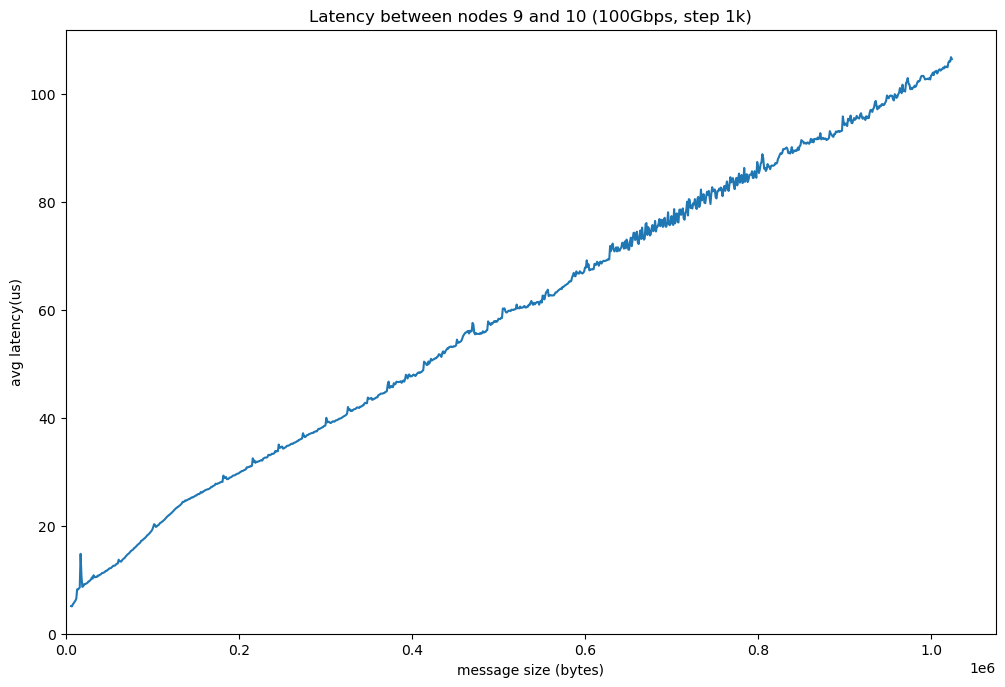

alpha=10.058235027599386
beta=9.457613786003079e-05
estimated bandwidth=10573.491608210554


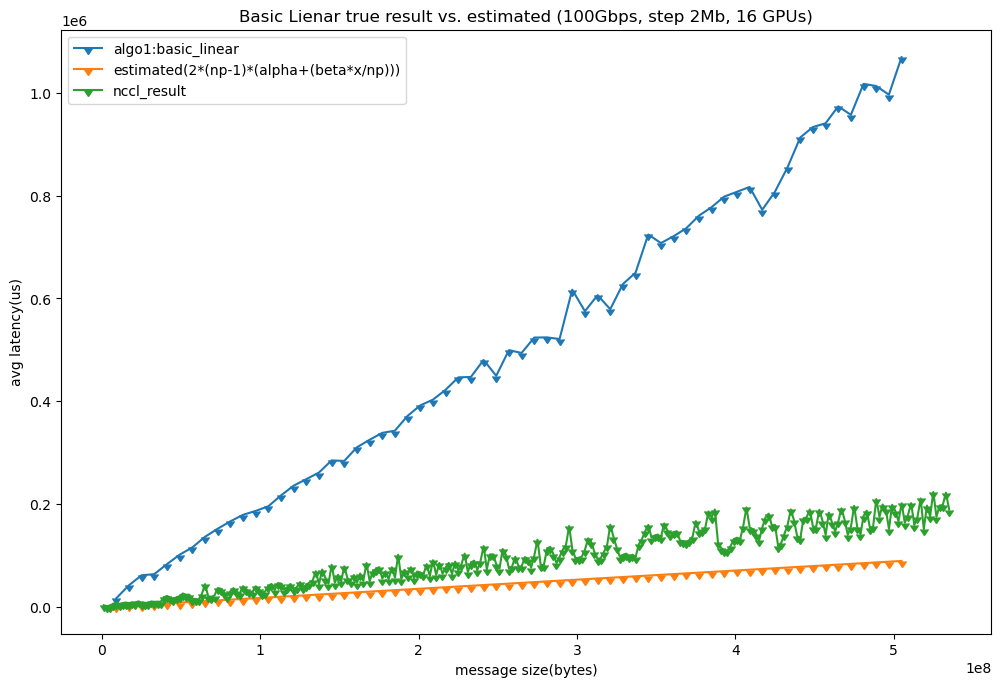

mse is:288483622777.82605


In [21]:

x = []
y = []

with open('data/gpus/lat-100g-step1k.txt') as f:
    for _ in range(4):
        next(f)
    
    for i in f:
        num = i.split()
        x.append(float(num[0]))
        y.append(float(num[1]))
        
# print(x)
# print(y)

def read_algo_skip_head(filename,skip_num=215):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(int(skip_num)):
            next(f)
    
        for line in f:
            if not line.startswith('#'):
                num = line.split()
                x.append(num[0])
                y.append(num[4])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x3, y3 = read_algo_skip_head('data/nccl-results/100g-step2m.txt', 215)
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.plot(x, y)

plt.xlabel('message size (bytes)')
plt.ylabel('avg latency(us)')
plt.title('Latency between nodes 9 and 10 (100Gbps, step 1k)')
plt.ylim(0)
plt.xlim(0)

# plt.legend()
# plt.savefig('imgs/lat-100g-step2m.png')
plt.show()

slope, intercept = np.polyfit(x,y,1)
print("alpha="+str(intercept))
print("beta="+str(slope))
print("estimated bandwidth="+str(1/slope))




def read_algo_with_head(filename):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(4):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

x, y1 = read_algo_with_head('data/gpus-2/100g-16p-algo4-step2m.txt')


plt.title('Basic Lienar true result vs. estimated (100Gbps, step 2Mb, 16 GPUs)')
plt.xlabel('message size(bytes)')
plt.ylabel('avg latency(us)')

plt.plot(x, y1, label='algo1:basic_linear', marker=11)


# plt.legend()
# plt.show()


alpha = intercept
beta = slope

# # reduce+braodcast
# # x2 = [2**x for x in range(2,29)]
# y2 = 2*(alpha+beta*x) # ignore computational cost per byte (+ np*message_size*gamma)
num_processes=16

# print(alpha,beta)
# ring
y2 = 2 * (num_processes-1) * (alpha+(x*beta)/num_processes) # ingore (num_processes-1)*(x*gamma/num_processes)

# plt.plot(x, y2, label='estimated', marker=11)
plt.plot(x, y2, label='estimated(2*(np-1)*(alpha+(beta*x/np)))', marker=11)
plt.plot(x3, y3, label='nccl_result', marker=11)
plt.legend()

plt.show()

mse = np.square(np.subtract(y1,y2)).mean() 
print('mse is:'+str(mse))